In [1]:
from keras.layers import Input, Dense, LSTM, merge ,Conv1D,Dropout,Bidirectional,Multiply
from keras.models import Model


# from attention_utils import get_activations
from keras.layers import merge,add
from keras.layers.core import *
from keras.layers.recurrent import LSTM
from keras.models import *

import  pandas as pd
import  numpy as np

Using TensorFlow backend.
c:\users\90478\desktop\ensemble-time-series-master\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\90478\desktop\ensemble-time-series-master\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\90478\desktop\ensemble-time-series-master\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

In [2]:
data = pd.read_csv('pollution.csv')

In [3]:
data

date  pollution  dew  temp   press wnd_dir  wnd_spd  \
0      2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79   
1      2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68   
2      2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57   
3      2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36   
4      2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25   
...                    ...        ...  ...   ...     ...     ...      ...   
43795  2014-12-31 19:00:00        8.0  -23  -2.0  1034.0      NW   231.97   
43796  2014-12-31 20:00:00       10.0  -22  -3.0  1034.0      NW   237.78   
43797  2014-12-31 21:00:00       10.0  -22  -3.0  1034.0      NW   242.70   
43798  2014-12-31 22:00:00        8.0  -22  -4.0  1034.0      NW   246.72   
43799  2014-12-31 23:00:00       12.0  -21  -3.0  1034.0      NW   249.85   

       snow  rain  
0         0     0  
1         0     0  
2         0     0  
3         1     0  
4         2     0  
...     ...   ...  
43795     0     0  
43796     0     0  
43797     0     0  
43798     0     0  
43799     0     0  

[43800 rows x 9 columns]

In [4]:
data.describe()

pollution           dew          temp         press       wnd_spd  \
count  43800.000000  43800.000000  43800.000000  43800.000000  43800.000000   
mean      94.013516      1.828516     12.459041   1016.447306     23.894307   
std       92.252276     14.429326     12.193384     10.271411     50.022729   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       24.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       68.000000      2.000000     14.000000   1016.000000      5.370000   
75%      132.250000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    585.600000   

               snow          rain  
count  43800.000000  43800.000000  
mean       0.052763      0.195023  
std        0.760582      1.416247  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max       27.000000     36.000000

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings("ignore")

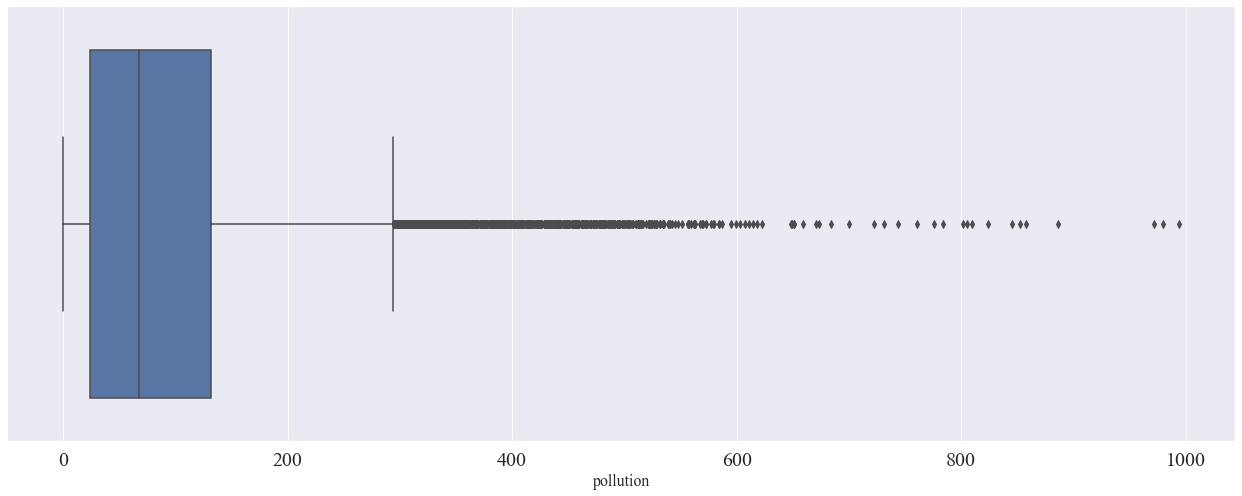

AttributeError: 'tuple' object has no attribute 'savefig'

In [11]:
# fig = plt.figure(figsize=(22,8))
# plt.plot(xgb_pred,label='xgb_pred')
# plt.plot(test_y,label='label')
# plt.legend()
# plt.title('xgb_performance')
# plt.show()
# fig.savefig('Xgboost performance.svg',format='svg')



fig = plt.subplots(figsize=(22, 8))
sns.boxplot(data['pollution'],whis=1.5)
plt.xlabel('pollution',fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.xticks(fontproperties = 'Times New Roman', size = 20)
plt.show()
fig.savefig('Contri.png',format='png')

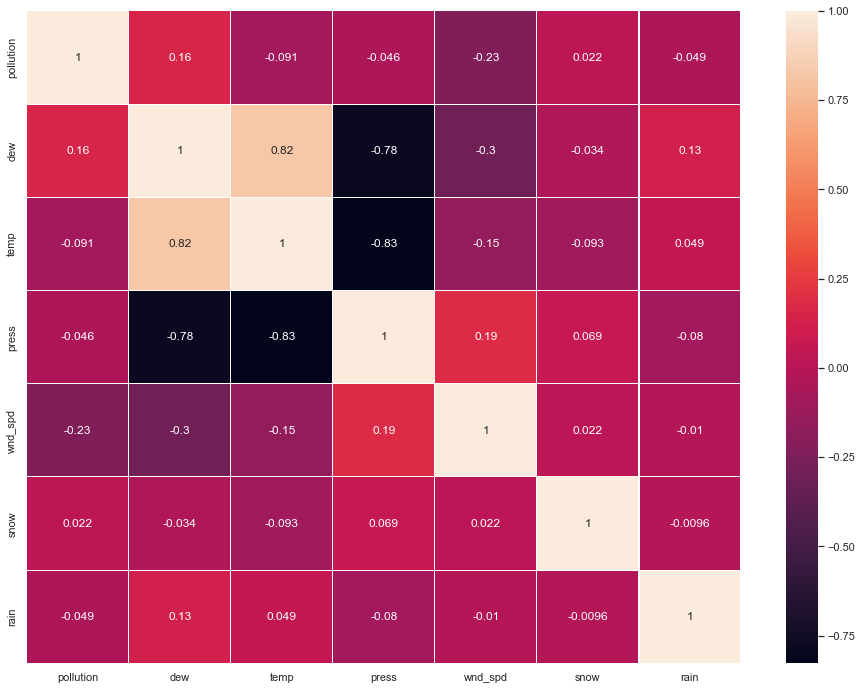

In [7]:
plt.subplots(figsize=(16, 12))
ax = sns.heatmap(data.corr(),annot=True,linewidths=.1)

In [8]:
# data1 = data.query('pollution<300')
data1 = data

In [9]:
data1

date  pollution  dew  temp   press wnd_dir  wnd_spd  \
0      2010-01-02 00:00:00     129.00  -16 -4.00 1020.00      SE     1.79   
1      2010-01-02 01:00:00     148.00  -15 -4.00 1020.00      SE     2.68   
2      2010-01-02 02:00:00     159.00  -11 -5.00 1021.00      SE     3.57   
3      2010-01-02 03:00:00     181.00   -7 -5.00 1022.00      SE     5.36   
4      2010-01-02 04:00:00     138.00   -7 -5.00 1022.00      SE     6.25   
...                    ...        ...  ...   ...     ...     ...      ...   
43795  2014-12-31 19:00:00       8.00  -23 -2.00 1034.00      NW   231.97   
43796  2014-12-31 20:00:00      10.00  -22 -3.00 1034.00      NW   237.78   
43797  2014-12-31 21:00:00      10.00  -22 -3.00 1034.00      NW   242.70   
43798  2014-12-31 22:00:00       8.00  -22 -4.00 1034.00      NW   246.72   
43799  2014-12-31 23:00:00      12.00  -21 -3.00 1034.00      NW   249.85   

       snow  rain  
0         0     0  
1         0     0  
2         0     0  
3         1     0  
4         2     0  
...     ...   ...  
43795     0     0  
43796     0     0  
43797     0     0  
43798     0     0  
43799     0     0  

[43800 rows x 9 columns]

In [10]:
pollution_shift1 = data1['pollution'].shift(1)

In [11]:
pollution_shift1

0          nan
1       129.00
2       148.00
3       159.00
4       181.00
         ...  
43795    10.00
43796     8.00
43797    10.00
43798    10.00
43799     8.00
Name: pollution, Length: 43800, dtype: float64

In [12]:
pollution_shift2 = data1['pollution'].shift(2)
pollution_shift3 = data1['pollution'].shift(3)

In [13]:
pollution_shift2

0          nan
1          nan
2       129.00
3       148.00
4       159.00
         ...  
43795     9.00
43796    10.00
43797     8.00
43798    10.00
43799    10.00
Name: pollution, Length: 43800, dtype: float64

In [14]:
pollution_shift3

0          nan
1          nan
2          nan
3       129.00
4       148.00
         ...  
43795     8.00
43796     9.00
43797    10.00
43798     8.00
43799    10.00
Name: pollution, Length: 43800, dtype: float64

In [15]:
pollution_shift1 = pollution_shift1[1:]

In [16]:
pollution_shift1

1       129.00
2       148.00
3       159.00
4       181.00
5       138.00
         ...  
43795    10.00
43796     8.00
43797    10.00
43798    10.00
43799     8.00
Name: pollution, Length: 43799, dtype: float64

In [17]:
pollution = data1['pollution'].values

In [18]:
pollution

array([129., 148., 159., ...,  10.,   8.,  12.])

In [19]:
dew = data1['dew'].values
temp = data1['temp'].values
press = data1['press'].values
wnd_spd = data1['wnd_spd'].values
snow = data1['snow'].values
rain = data1['rain'].values

In [20]:
print('pollution:',pollution)
print('shape:',pollution.shape)

print('dew:',dew)
print('shape:',dew.shape)

print('temp:',temp)
print('temp:',temp.shape)

print('press:',press)
print('shape:',press.shape)

print('wnd_spd:',wnd_spd)
print('shape:',wnd_spd.shape)

print('snow:',snow)
print('shape:',snow.shape)

print('rain:',rain)
print('shape:',rain.shape)

pollution: [129. 148. 159. ...  10.   8.  12.]
shape: (43800,)
dew: [-16 -15 -11 ... -22 -22 -21]
shape: (43800,)
temp: [-4. -4. -5. ... -3. -4. -3.]
temp: (43800,)
press: [1020. 1020. 1021. ... 1034. 1034. 1034.]
shape: (43800,)
wnd_spd: [  1.79   2.68   3.57 ... 242.7  246.72 249.85]
shape: (43800,)
snow: [0 0 0 ... 0 0 0]
shape: (43800,)
rain: [0 0 0 ... 0 0 0]
shape: (43800,)


In [21]:
train_percentage = 0.8
train_size = int(len(data)*train_percentage)
train_size

35040

In [22]:
pollution_shift1 = data1['pollution'].shift(1)

In [23]:
pollution_shift1

0          nan
1       129.00
2       148.00
3       159.00
4       181.00
         ...  
43795    10.00
43796     8.00
43797    10.00
43798    10.00
43799     8.00
Name: pollution, Length: 43800, dtype: float64

In [24]:
data1['pollution_shift1'] = pollution_shift1

In [25]:
data1

date  pollution  dew  temp   press wnd_dir  wnd_spd  \
0      2010-01-02 00:00:00     129.00  -16 -4.00 1020.00      SE     1.79   
1      2010-01-02 01:00:00     148.00  -15 -4.00 1020.00      SE     2.68   
2      2010-01-02 02:00:00     159.00  -11 -5.00 1021.00      SE     3.57   
3      2010-01-02 03:00:00     181.00   -7 -5.00 1022.00      SE     5.36   
4      2010-01-02 04:00:00     138.00   -7 -5.00 1022.00      SE     6.25   
...                    ...        ...  ...   ...     ...     ...      ...   
43795  2014-12-31 19:00:00       8.00  -23 -2.00 1034.00      NW   231.97   
43796  2014-12-31 20:00:00      10.00  -22 -3.00 1034.00      NW   237.78   
43797  2014-12-31 21:00:00      10.00  -22 -3.00 1034.00      NW   242.70   
43798  2014-12-31 22:00:00       8.00  -22 -4.00 1034.00      NW   246.72   
43799  2014-12-31 23:00:00      12.00  -21 -3.00 1034.00      NW   249.85   

       snow  rain  pollution_shift1  
0         0     0               nan  
1         0     0            129.00  
2         0     0            148.00  
3         1     0            159.00  
4         2     0            181.00  
...     ...   ...               ...  
43795     0     0             10.00  
43796     0     0              8.00  
43797     0     0             10.00  
43798     0     0             10.00  
43799     0     0              8.00  

[43800 rows x 10 columns]

In [26]:
data1['pollution_shift2'] = pollution_shift2
data1['pollution_shift3'] = pollution_shift3

In [27]:
data1

date  pollution  dew  temp   press wnd_dir  wnd_spd  \
0      2010-01-02 00:00:00     129.00  -16 -4.00 1020.00      SE     1.79   
1      2010-01-02 01:00:00     148.00  -15 -4.00 1020.00      SE     2.68   
2      2010-01-02 02:00:00     159.00  -11 -5.00 1021.00      SE     3.57   
3      2010-01-02 03:00:00     181.00   -7 -5.00 1022.00      SE     5.36   
4      2010-01-02 04:00:00     138.00   -7 -5.00 1022.00      SE     6.25   
...                    ...        ...  ...   ...     ...     ...      ...   
43795  2014-12-31 19:00:00       8.00  -23 -2.00 1034.00      NW   231.97   
43796  2014-12-31 20:00:00      10.00  -22 -3.00 1034.00      NW   237.78   
43797  2014-12-31 21:00:00      10.00  -22 -3.00 1034.00      NW   242.70   
43798  2014-12-31 22:00:00       8.00  -22 -4.00 1034.00      NW   246.72   
43799  2014-12-31 23:00:00      12.00  -21 -3.00 1034.00      NW   249.85   

       snow  rain  pollution_shift1  pollution_shift2  pollution_shift3  
0         0     0               nan               nan               nan  
1         0     0            129.00               nan               nan  
2         0     0            148.00            129.00               nan  
3         1     0            159.00            148.00            129.00  
4         2     0            181.00            159.00            148.00  
...     ...   ...               ...               ...               ...  
43795     0     0             10.00              9.00              8.00  
43796     0     0              8.00             10.00              9.00  
43797     0     0             10.00              8.00             10.00  
43798     0     0             10.00             10.00              8.00  
43799     0     0              8.00             10.00             10.00  

[43800 rows x 12 columns]

In [28]:
data1 = data1[3:]

In [29]:
data1

date  pollution  dew  temp   press wnd_dir  wnd_spd  \
3      2010-01-02 03:00:00     181.00   -7 -5.00 1022.00      SE     5.36   
4      2010-01-02 04:00:00     138.00   -7 -5.00 1022.00      SE     6.25   
5      2010-01-02 05:00:00     109.00   -7 -6.00 1022.00      SE     7.14   
6      2010-01-02 06:00:00     105.00   -7 -6.00 1023.00      SE     8.93   
7      2010-01-02 07:00:00     124.00   -7 -5.00 1024.00      SE    10.72   
...                    ...        ...  ...   ...     ...     ...      ...   
43795  2014-12-31 19:00:00       8.00  -23 -2.00 1034.00      NW   231.97   
43796  2014-12-31 20:00:00      10.00  -22 -3.00 1034.00      NW   237.78   
43797  2014-12-31 21:00:00      10.00  -22 -3.00 1034.00      NW   242.70   
43798  2014-12-31 22:00:00       8.00  -22 -4.00 1034.00      NW   246.72   
43799  2014-12-31 23:00:00      12.00  -21 -3.00 1034.00      NW   249.85   

       snow  rain  pollution_shift1  pollution_shift2  pollution_shift3  
3         1     0            159.00            148.00            129.00  
4         2     0            181.00            159.00            148.00  
5         3     0            138.00            181.00            159.00  
6         4     0            109.00            138.00            181.00  
7         0     0            105.00            109.00            138.00  
...     ...   ...               ...               ...               ...  
43795     0     0             10.00              9.00              8.00  
43796     0     0              8.00             10.00              9.00  
43797     0     0             10.00              8.00             10.00  
43798     0     0             10.00             10.00              8.00  
43799     0     0              8.00             10.00             10.00  

[43797 rows x 12 columns]

In [30]:
data1.describe()

pollution      dew     temp    press  wnd_spd     snow     rain  \
count   43797.00 43797.00 43797.00 43797.00 43797.00 43797.00 43797.00   
mean       94.01     1.83    12.46  1016.45    23.90     0.05     0.20   
std        92.25    14.43    12.19    10.27    50.02     0.76     1.42   
min         0.00   -40.00   -19.00   991.00     0.45     0.00     0.00   
25%        24.00   -10.00     2.00  1008.00     1.79     0.00     0.00   
50%        68.00     2.00    14.00  1016.00     5.37     0.00     0.00   
75%       132.00    15.00    23.00  1025.00    21.91     0.00     0.00   
max       994.00    28.00    42.00  1046.00   585.60    27.00    36.00   

       pollution_shift1  pollution_shift2  pollution_shift3  
count          43797.00          43797.00          43797.00  
mean              94.01             94.02             94.02  
std               92.25             92.25             92.25  
min                0.00              0.00              0.00  
25%               24.00             24.00             24.00  
50%               68.00             68.00             68.00  
75%              132.00            133.00            133.00  
max              994.00            994.00            994.00

In [31]:
pollution_next = data['pollution'].shift(-1)

In [32]:
data1['pollution_next'] = pollution_next

In [33]:
data1

date  pollution  dew  temp   press wnd_dir  wnd_spd  \
3      2010-01-02 03:00:00     181.00   -7 -5.00 1022.00      SE     5.36   
4      2010-01-02 04:00:00     138.00   -7 -5.00 1022.00      SE     6.25   
5      2010-01-02 05:00:00     109.00   -7 -6.00 1022.00      SE     7.14   
6      2010-01-02 06:00:00     105.00   -7 -6.00 1023.00      SE     8.93   
7      2010-01-02 07:00:00     124.00   -7 -5.00 1024.00      SE    10.72   
...                    ...        ...  ...   ...     ...     ...      ...   
43795  2014-12-31 19:00:00       8.00  -23 -2.00 1034.00      NW   231.97   
43796  2014-12-31 20:00:00      10.00  -22 -3.00 1034.00      NW   237.78   
43797  2014-12-31 21:00:00      10.00  -22 -3.00 1034.00      NW   242.70   
43798  2014-12-31 22:00:00       8.00  -22 -4.00 1034.00      NW   246.72   
43799  2014-12-31 23:00:00      12.00  -21 -3.00 1034.00      NW   249.85   

       snow  rain  pollution_shift1  pollution_shift2  pollution_shift3  \
3         1     0            159.00            148.00            129.00   
4         2     0            181.00            159.00            148.00   
5         3     0            138.00            181.00            159.00   
6         4     0            109.00            138.00            181.00   
7         0     0            105.00            109.00            138.00   
...     ...   ...               ...               ...               ...   
43795     0     0             10.00              9.00              8.00   
43796     0     0              8.00             10.00              9.00   
43797     0     0             10.00              8.00             10.00   
43798     0     0             10.00             10.00              8.00   
43799     0     0              8.00             10.00             10.00   

       pollution_next  
3              138.00  
4              109.00  
5              105.00  
6              124.00  
7              120.00  
...               ...  
43795           10.00  
43796           10.00  
43797            8.00  
43798           12.00  
43799             nan  

[43797 rows x 13 columns]

In [34]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [35]:
data2 = data1.drop(['wnd_dir'],axis=1)

In [36]:
data2

date  pollution  dew  temp   press  wnd_spd  snow  rain  \
3      2010-01-02 03:00:00     181.00   -7 -5.00 1022.00     5.36     1     0   
4      2010-01-02 04:00:00     138.00   -7 -5.00 1022.00     6.25     2     0   
5      2010-01-02 05:00:00     109.00   -7 -6.00 1022.00     7.14     3     0   
6      2010-01-02 06:00:00     105.00   -7 -6.00 1023.00     8.93     4     0   
7      2010-01-02 07:00:00     124.00   -7 -5.00 1024.00    10.72     0     0   
...                    ...        ...  ...   ...     ...      ...   ...   ...   
43795  2014-12-31 19:00:00       8.00  -23 -2.00 1034.00   231.97     0     0   
43796  2014-12-31 20:00:00      10.00  -22 -3.00 1034.00   237.78     0     0   
43797  2014-12-31 21:00:00      10.00  -22 -3.00 1034.00   242.70     0     0   
43798  2014-12-31 22:00:00       8.00  -22 -4.00 1034.00   246.72     0     0   
43799  2014-12-31 23:00:00      12.00  -21 -3.00 1034.00   249.85     0     0   

       pollution_shift1  pollution_shift2  pollution_shift3  pollution_next  
3                159.00            148.00            129.00          138.00  
4                181.00            159.00            148.00          109.00  
5                138.00            181.00            159.00          105.00  
6                109.00            138.00            181.00          124.00  
7                105.00            109.00            138.00          120.00  
...                 ...               ...               ...             ...  
43795             10.00              9.00              8.00           10.00  
43796              8.00             10.00              9.00           10.00  
43797             10.00              8.00             10.00            8.00  
43798             10.00             10.00              8.00           12.00  
43799              8.00             10.00             10.00             nan  

[43797 rows x 12 columns]

In [37]:
data2 = data2.values

In [38]:
data2 = data2[:,1:]

In [39]:
data2

array([[181.0, -7, -5.0, ..., 148.0, 129.0, 138.0],
       [138.0, -7, -5.0, ..., 159.0, 148.0, 109.0],
       [109.0, -7, -6.0, ..., 181.0, 159.0, 105.0],
       ...,
       [10.0, -22, -3.0, ..., 8.0, 10.0, 8.0],
       [8.0, -22, -4.0, ..., 10.0, 8.0, 12.0],
       [12.0, -21, -3.0, ..., 10.0, 10.0, nan]], dtype=object)

In [40]:
data2.shape

(43797, 11)

In [41]:
y = data2[:,-1]

In [42]:
y

array([138.0, 109.0, 105.0, ..., 8.0, 12.0, nan], dtype=object)

In [43]:
x = data2[:,:-1]

In [44]:
x

array([[181.0, -7, -5.0, ..., 159.0, 148.0, 129.0],
       [138.0, -7, -5.0, ..., 181.0, 159.0, 148.0],
       [109.0, -7, -6.0, ..., 138.0, 181.0, 159.0],
       ...,
       [10.0, -22, -3.0, ..., 10.0, 8.0, 10.0],
       [8.0, -22, -4.0, ..., 10.0, 10.0, 8.0],
       [12.0, -21, -3.0, ..., 8.0, 10.0, 10.0]], dtype=object)

In [45]:
# pol = PolynomialFeatures(degree=3 ,include_bias=False)
# res = pol.fit_transform(x)

In [45]:
res=x

In [46]:
res.shape

(43797, 10)

In [47]:
x = res

In [48]:
train_x = x[:train_size,:]

In [49]:
train_x

array([[181.0, -7, -5.0, ..., 159.0, 148.0, 129.0],
       [138.0, -7, -5.0, ..., 181.0, 159.0, 148.0],
       [109.0, -7, -6.0, ..., 138.0, 181.0, 159.0],
       ...,
       [24.0, -20, 7.0, ..., 23.0, 20.0, 23.0],
       [53.0, -20, 7.0, ..., 24.0, 23.0, 20.0],
       [65.0, -20, 6.0, ..., 53.0, 24.0, 23.0]], dtype=object)

In [50]:
train_x.shape

(35040, 10)

In [51]:
train_y = y[:train_size]

In [52]:
train_y

array([138.0, 109.0, 105.0, ..., 53.0, 65.0, 70.0], dtype=object)

In [53]:
train_y.shape

(35040,)

In [54]:
validation_percentage = 0.8
validation_size = int(train_size*0.8)
validation_size

28032

In [55]:
train_data_x = train_x[:validation_size]
train_data_y = train_y[:validation_size]

In [56]:
train_validation_x = train_x[validation_size:]
train_validation_y = train_y[validation_size:]

In [57]:
train_validation_x.shape

(7008, 10)

In [58]:
from xgboost import XGBRegressor
from xgboost import plot_importance


xgb_model = XGBRegressor(max_depth=9, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7,
                         subsample=1, 
                         eta=0.1,
                         seed=0)
xgb_model.fit(train_data_x, 
              train_data_y, 
              eval_metric="rmse", 
              eval_set=[(train_validation_x,train_validation_y)], 
              verbose=20, 
              early_stopping_rounds=60)

[0]	validation_0-rmse:106.15167
[20]	validation_0-rmse:27.04079
[40]	validation_0-rmse:23.98871
[60]	validation_0-rmse:23.53013
[80]	validation_0-rmse:23.36754
[100]	validation_0-rmse:23.27554
[120]	validation_0-rmse:23.19830
[140]	validation_0-rmse:23.14187
[160]	validation_0-rmse:23.10361
[180]	validation_0-rmse:23.08209
[200]	validation_0-rmse:23.09068
[220]	validation_0-rmse:23.06692
[240]	validation_0-rmse:23.03993
[260]	validation_0-rmse:23.04829
[280]	validation_0-rmse:23.02784
[300]	validation_0-rmse:23.02160
[320]	validation_0-rmse:23.02316
[340]	validation_0-rmse:23.00731
[360]	validation_0-rmse:23.00131
[380]	validation_0-rmse:22.98922
[400]	validation_0-rmse:22.96763
[420]	validation_0-rmse:22.96910
[440]	validation_0-rmse:22.97043
[460]	validation_0-rmse:22.96655
[480]	validation_0-rmse:22.95132
[499]	validation_0-rmse:22.95137


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=9,
             min_child_weight=1000, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
from xgboost import to_graphviz

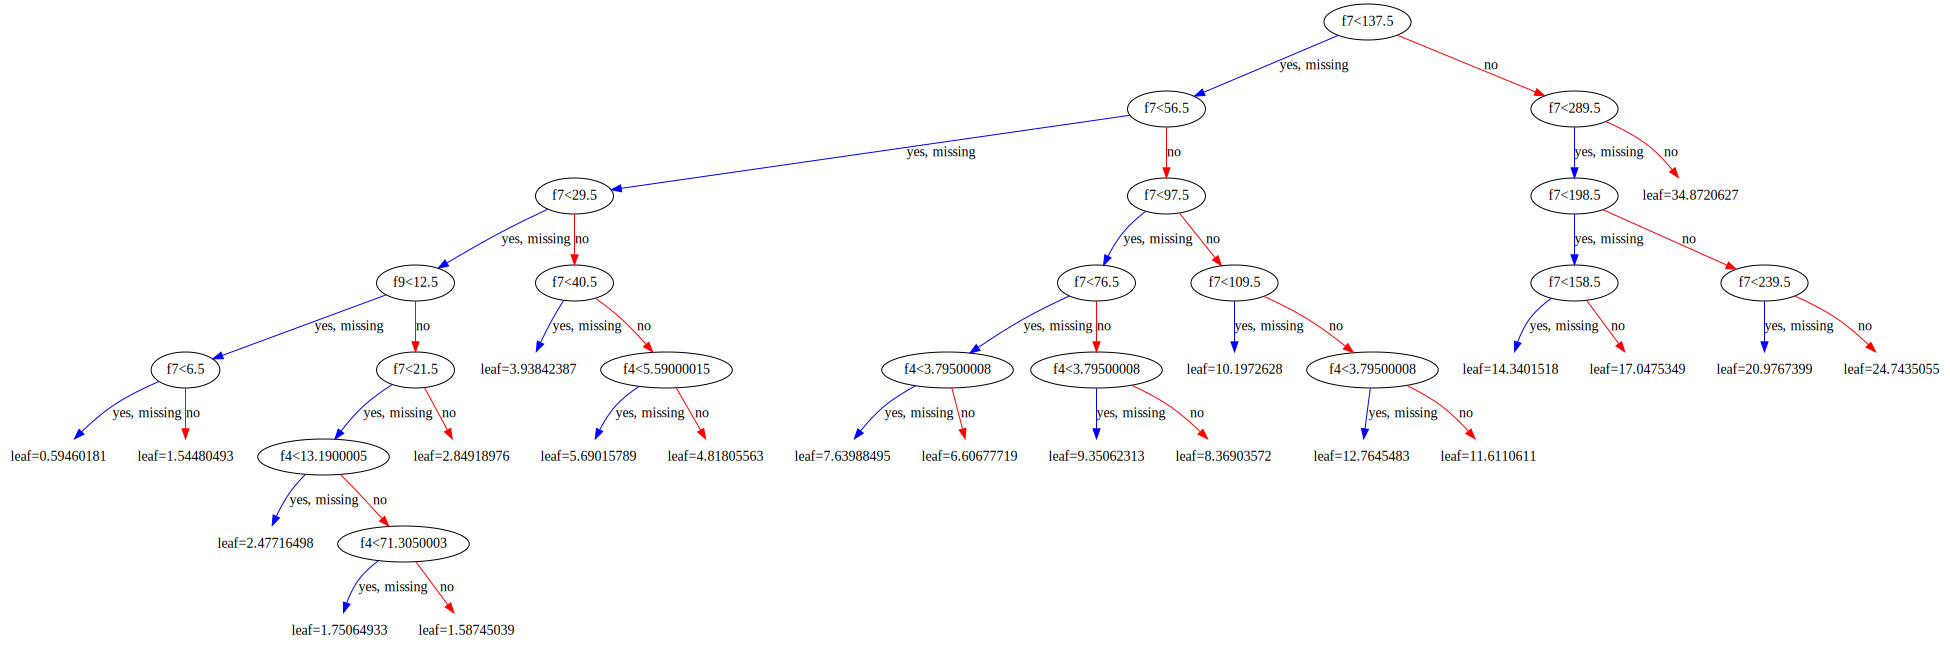

In [60]:
to_graphviz(xgb_model, num_trees=0, leaf_node_params={'shape': 'plaintext'})

In [61]:
x.shape

(43797, 10)

In [62]:
test_x = x[train_size:]
test_y = y[train_size:]

In [63]:
xgb_pred = xgb_model.predict(test_x)

In [64]:
print('xgb_pred:',xgb_pred)
print('shape:',xgb_pred.shape)

xgb_pred: [70.439964 90.87977  94.6547   ... 10.988407  9.719864 12.897383]
shape: (8757,)


In [65]:
test_x.shape

(8757, 10)

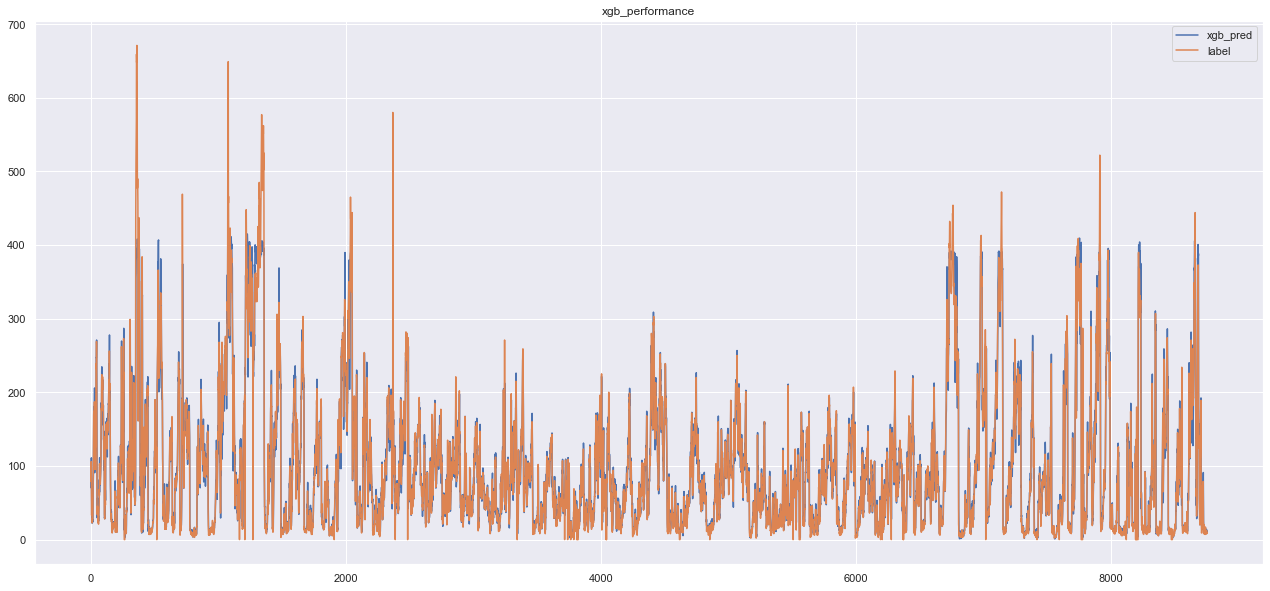

In [66]:
fig = plt.figure(figsize=(22,10))
plt.plot(xgb_pred,label='xgb_pred')
plt.plot(test_y,label='label')
plt.legend()
plt.title('xgb_performance')
plt.show()
fig.savefig('Xgboost performance.svg',format='svg')

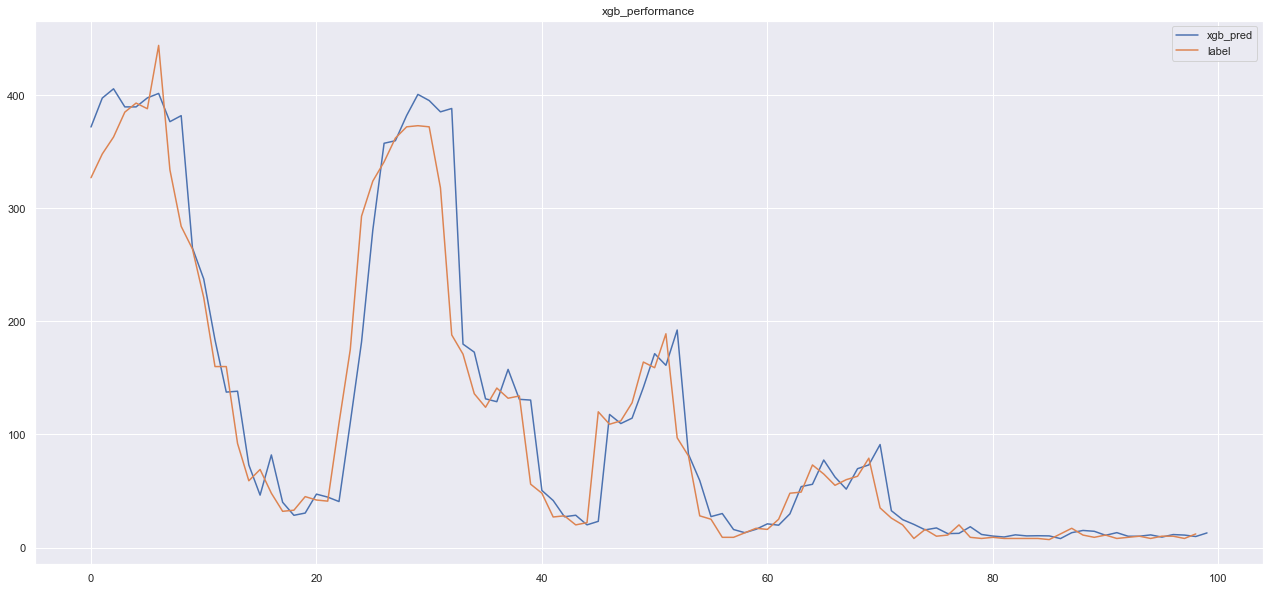

In [67]:
plt.figure(figsize=(22,10))
plt.plot(xgb_pred[-100:],label='xgb_pred')
plt.plot(test_y[-100:],label='label')
plt.legend()
plt.title('xgb_performance')
plt.show()

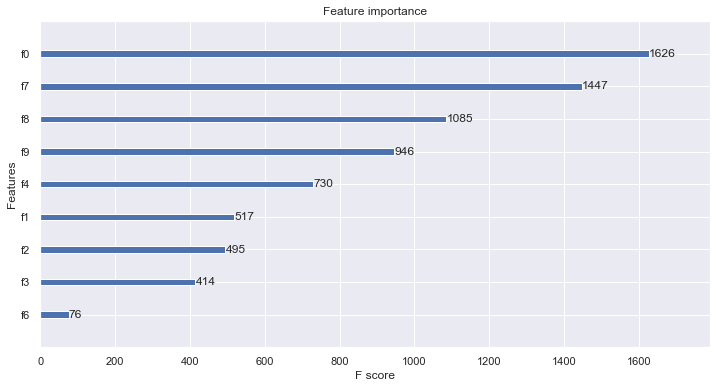

<Figure size 864x432 with 0 Axes>

In [73]:
plt.rcParams["figure.figsize"] = (12, 6)
plot_importance(xgb_model)
plt.show()
plt.savefig('xgb.png',format='png')

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
test_y

array([79.0, 92.0, 106.0, ..., 8.0, 12.0, nan], dtype=object)

In [72]:
xgboost_test_mse = mean_squared_error(xgb_pred[:-1],test_y[:-1])
print('xgboost_test_mse:',xgboost_test_mse)

xgboost_test_mse: 674.1343715557066


In [73]:
def GetRMSE(y_hat,y_test):
    sum = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
    return  sum

def GetMAE(y_hat,y_test):
    sum = metrics.mean_absolute_error(y_test, y_hat)
    return  sum

def GetMAPE(y_hat,y_test):
    sum = np.mean(np.abs((y_hat - y_test) / y_test)) * 100
    return sum

def GetMAPE_Order(y_hat,y_test):
    #删除y_test 为0元素
    zero_index = np.where(y_test == 0)
    y_hat = np.delete(y_hat,zero_index[0])
    y_test = np.delete(y_test,zero_index[0])
    sum = np.mean(np.abs((y_hat - y_test) / y_test)) * 100
    return sum

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

In [74]:
from  sklearn import  metrics

xgb_rmse = GetRMSE(xgb_pred[:-1],test_y[:-1])
xgb_mae = GetMAE(xgb_pred[:-1],test_y[:-1])
xgb_mape = GetMAPE_Order(xgb_pred[:-1],test_y[:-1])
xgb_smape = smape(xgb_pred[:-1],test_y[:-1])

print("xgb_performance:")
print("RMSE为",xgb_rmse)
print("MAE为",xgb_mae)
print("MAPE为",xgb_mape)
print("MSE为",xgboost_test_mse)
print("SMAPE为",xgb_smape)

print("=====================================")

xgb_performance:
RMSE为 25.964097741991857
MAE为 13.632357736310444
MAPE为 23.04498632926373
MSE为 674.1343715557066
SMAPE为 20.80226035332023


In [75]:
shift_rmse = GetRMSE(test_y[1:-1],test_y[:-2])
shift_mae = GetMAE(test_y[1:-1],test_y[:-2])
shift_mape = GetMAPE_Order(test_y[1:-1],test_y[:-2])
print("RMSE为",shift_rmse)
print("MAE为",shift_mae)
print("MAPE为",shift_mape)

RMSE为 24.519168133104824
MAE为 12.43049685893775
MAPE为 18.686029646242602


In [76]:
import catboost
from catboost import Pool
from catboost import CatBoostRegressor

In [77]:
catboost_model = CatBoostRegressor(
    iterations=500,
    max_ctr_complexity=4,
    random_seed=0,
    od_type='Iter',
    od_wait=25,
    verbose=50,
    depth=9
)

catboost_model.fit(train_data_x, 
              train_data_y,
    eval_set=(train_validation_x, train_validation_y)
)

Learning rate set to 0.13324
0:	learn: 84.3782830	test: 68.8810937	best: 68.8810937 (0)	total: 362ms	remaining: 3m
50:	learn: 24.1421732	test: 21.5055526	best: 21.5055526 (50)	total: 8.24s	remaining: 1m 12s
100:	learn: 22.2244734	test: 21.2862650	best: 21.2736643 (97)	total: 16s	remaining: 1m 3s
150:	learn: 20.8738817	test: 21.1841596	best: 21.1787071 (147)	total: 23.9s	remaining: 55.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 21.16051185
bestIteration = 170

Shrink model to first 171 iterations.


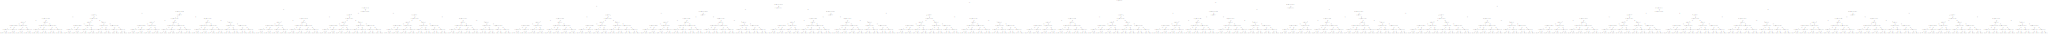

In [78]:
catboost_model.plot_tree(
    tree_idx=100
)


In [79]:
cat_pred = catboost_model.predict(test_x)

In [80]:
plt.figure(figsize=(22,10))
plt.plot(cat_pred,label='cat_pred')
plt.plot(test_y,label='label')
plt.legend()
plt.title('catboost_performance')
plt.show()

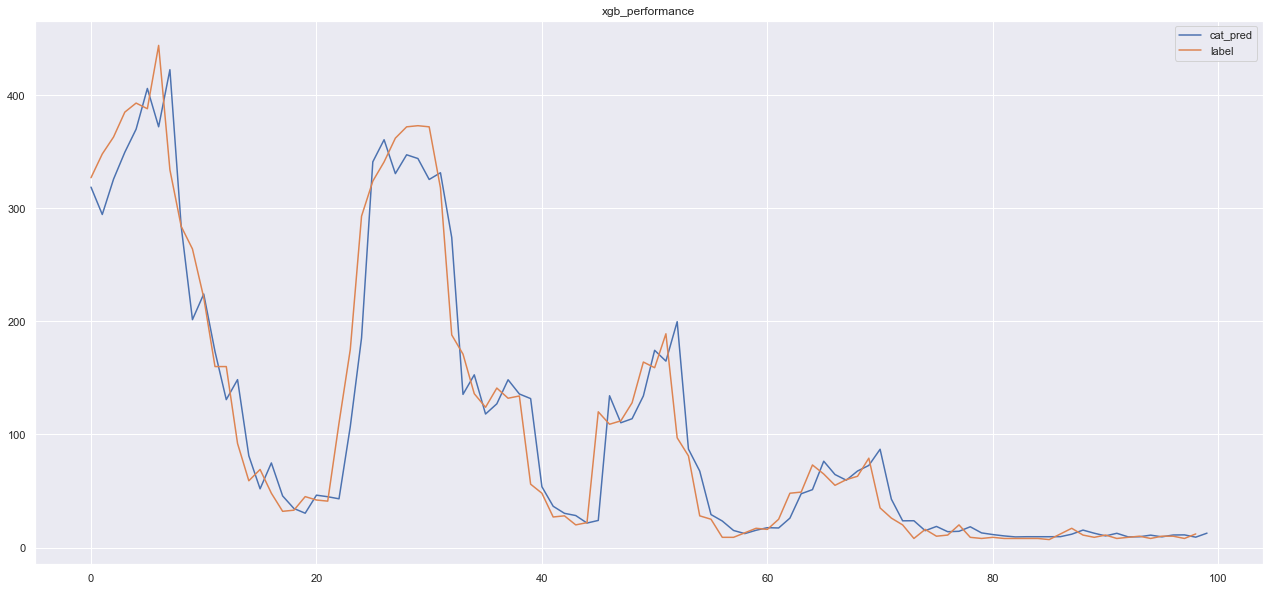

In [81]:
plt.figure(figsize=(22,10))
plt.plot(cat_pred[-100:],label='cat_pred')
plt.plot(test_y[-100:],label='label')
plt.legend()
plt.title('xgb_performance')
plt.show()

In [82]:
catboost_test_mse = mean_squared_error(cat_pred[:-1],test_y[:-1])
print('catboost_test_mse:',catboost_test_mse)

catboost_test_mse: 556.3523189175789


In [83]:
print('Model params:', catboost_model.get_params())

Model params: {'max_ctr_complexity': 4, 'verbose': 50, 'random_seed': 0, 'od_type': 'Iter', 'od_wait': 25, 'loss_function': 'RMSE', 'depth': 9, 'iterations': 500}


In [84]:
feature_score = pd.DataFrame(list(zip(pd.DataFrame(train_data_x).dtypes.index, catboost_model.get_feature_importance(Pool(train_data_x, label=train_data_y)))), columns=['Feature','Score'])
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

plt.rcParams["figure.figsize"] = (80, 70)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')
rects = ax.patches
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [85]:
cat_rmse = GetRMSE(cat_pred[:-1],test_y[:-1])
cat_mae = GetMAE(cat_pred[:-1],test_y[:-1])
cat_mape = GetMAPE_Order(cat_pred[:-1],test_y[:-1])
cat_smape = smape(cat_pred[:-1],test_y[:-1])


print("cat_performance:")
print("RMSE为",cat_rmse)
print("MAE为",cat_mae)
print("MAPE为",cat_mape)
print("MSE为",catboost_test_mse)
print("SMAPE为",cat_smape)

print("=====================================")

cat_performance:
RMSE为 23.58712188711414
MAE为 12.741559084490534
MAPE为 23.930088833081992
MSE为 556.3523189175789
SMAPE为 21.064300063068337


In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=0, n_jobs=-1)
rf_model.fit(train_data_x, train_data_y)

RandomForestRegressor(max_depth=9, n_estimators=500, n_jobs=-1, random_state=0)

In [88]:
import os
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

# 系统环境变量添加Graphviz安装路径，以便下面代码可以用dot命令
# os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin'

# iris = load_iris()
# X, y = iris.data, iris.target
# model = RandomForestClassifier(n_estimators=3, max_features=1)
# model.fit(X, y)

# 循环打印每棵树
for idx, estimator in enumerate(rf_model.estimators_):
    # 导出dot文件
    if(idx == 0):
        export_graphviz(estimator,
                        out_file='tree{}.dot'.format(idx),
    #                     feature_names=iris.feature_names,
    #                     class_names=iris.target_names,
                        rounded=True,
                        proportion=False,
                        precision=2,
                        filled=True)
        # 转换为png文件
        os.system('dot -Tpng tree{}.dot -o tree{}.png'.format(idx, idx))


In [89]:
rf_pred = rf_model.predict(test_x)

In [90]:
print('rf_pred:',rf_pred)
print('shape:',rf_pred.shape)

rf_pred: [81.25607333 81.95485224 90.98514991 ... 12.78454688 12.60072591
 13.32103444]
shape: (8757,)


In [93]:

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}

fig = plt.figure(figsize=(22,10))
plt.plot(rf_pred[:-1],label='rf_pred')
plt.plot(test_y[:-1],label='True')

plt.legend(prop=font1)
plt.xlabel("Samples",fontdict={'family' : 'Times New Roman',  'size'   : 18})
plt.ylabel("Value",fontdict={'family' : 'Times New Roman',  'size'   : 18})
plt.title('Rf_performance',fontsize=18)
plt.show()
fig.savefig('random forest performance.svg',format='svg')

In [94]:
rf_test_mse = mean_squared_error(rf_pred[:-1],test_y[:-1])
print('rf_test_mse:',rf_test_mse)

rf_test_mse: 563.6426277073906


In [95]:
rf_rmse = GetRMSE(rf_pred[:-1],test_y[:-1])
rf_mae = GetMAE(rf_pred[:-1],test_y[:-1])
rf_mape = GetMAPE_Order(rf_pred[:-1],test_y[:-1])
rf_smape = smape(rf_pred[:-1],test_y[:-1])


print("rf_performance:")
print("RMSE为",rf_rmse)
print("MAE为",rf_mae)
print("MAPE为",rf_mape)
print("MSE为",rf_test_mse)
print("SMAPE为",rf_smape)

print("=====================================")

rf_performance:
RMSE为 23.741158937747556
MAE为 12.522260703825957
MAPE为 23.138959317502994
MSE为 563.6426277073906
SMAPE为 20.652748334617318


In [96]:
train_size

35040

In [97]:
import lightgbm as lgb

In [98]:
params = {
    "objective" : "regression",
    "metric" : "rmse",
    "num_leaves" : 40,
    "learning_rate" : 0.004,
    "bagging_fraction" : 0.6,
    "feature_fraction" : 0.6,
    "bagging_frequency" : 6,
    "bagging_seed" : 42,
    "verbosity" : -1,
    "seed": 42
}
    
lgtrain = lgb.Dataset(train_data_x, label=train_data_y)
lgval = lgb.Dataset(train_validation_x, label=train_validation_y)
evals_result = {}
lgb_model = lgb.train(params, lgtrain, 5000, 
                  valid_sets=[lgtrain, lgval], 
                  early_stopping_rounds=100, 
                  verbose_eval=150, 
                  evals_result=evals_result)

[LightGBM] [Warning] Unknown parameter: bagging_frequency
Training until validation scores don't improve for 100 rounds
[150]	training's rmse: 56.8418	valid_1's rmse: 46.2262
[300]	training's rmse: 38.1573	valid_1's rmse: 30.7663
[450]	training's rmse: 29.9363	valid_1's rmse: 24.3562
[600]	training's rmse: 26.5232	valid_1's rmse: 22.0848
[750]	training's rmse: 24.9713	valid_1's rmse: 21.3841
[900]	training's rmse: 24.0902	valid_1's rmse: 21.1837
[1050]	training's rmse: 23.4877	valid_1's rmse: 21.1426
[1200]	training's rmse: 23.0183	valid_1's rmse: 21.1407
Early stopping, best iteration is:
[1248]	training's rmse: 22.8714	valid_1's rmse: 21.1355


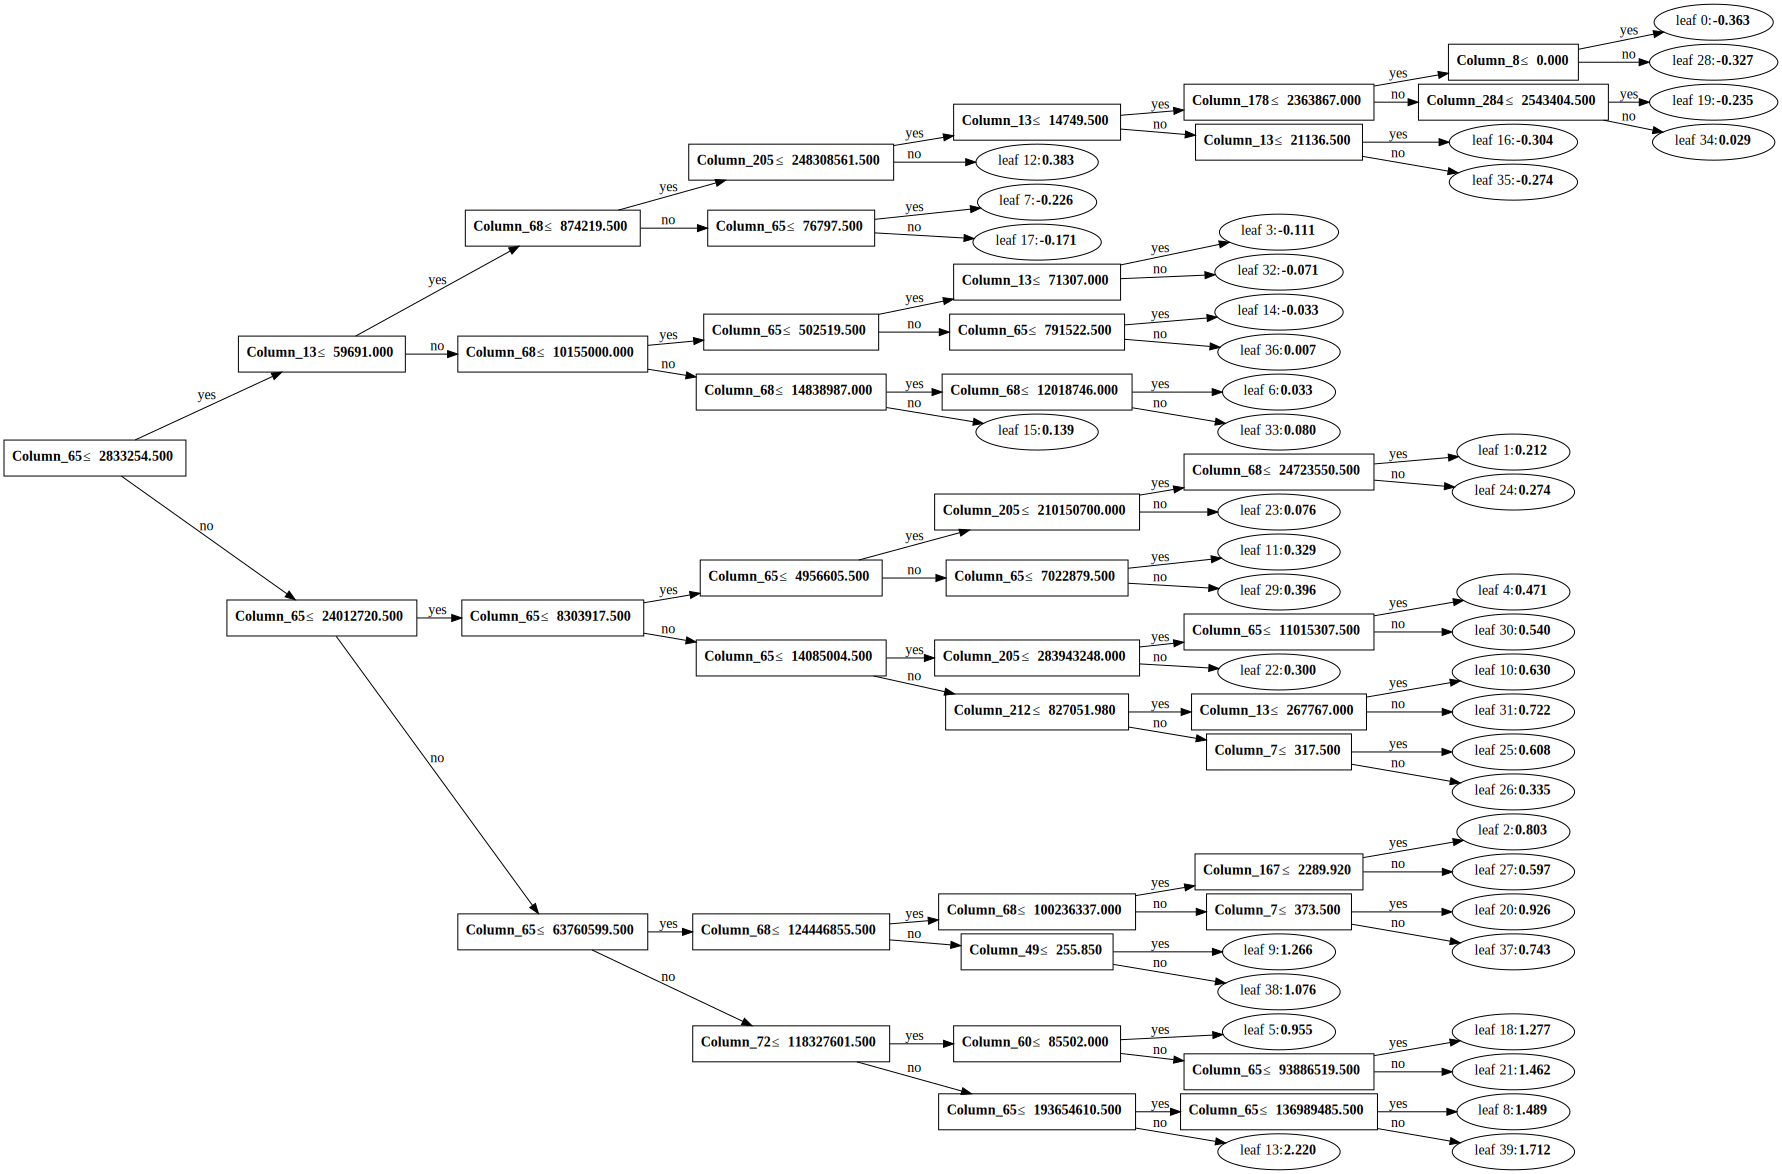

In [99]:
lgb.create_tree_digraph(lgb_model, tree_index=1)

In [100]:
lgb_pred = lgb_model.predict(test_x, num_iteration=lgb_model.best_iteration)

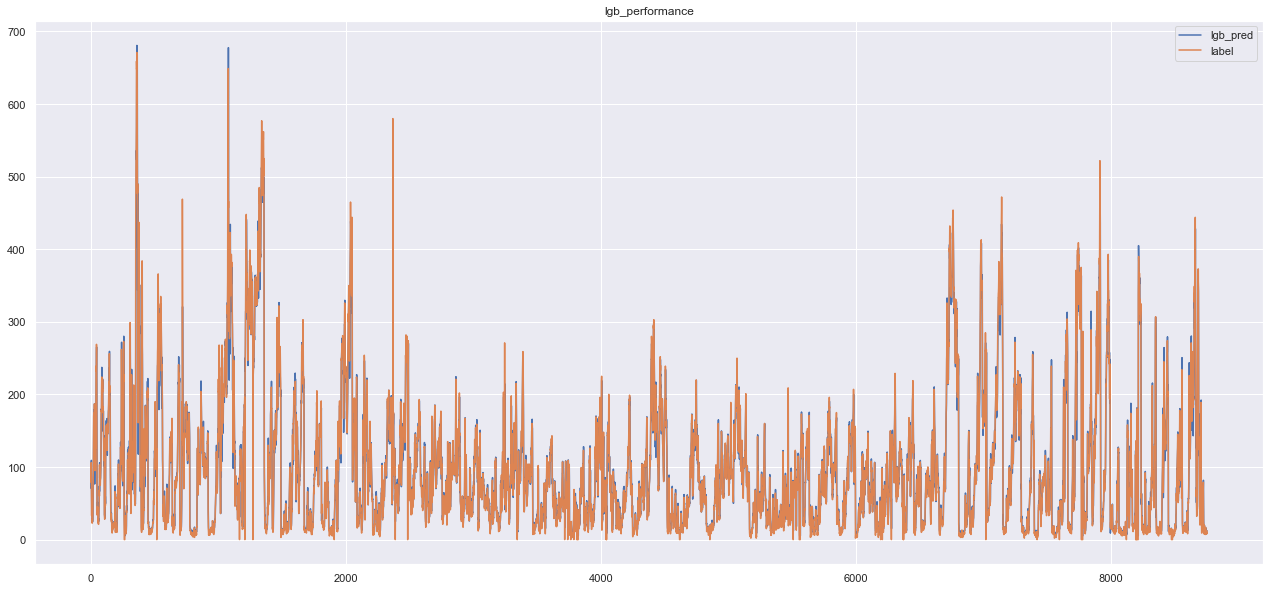

In [101]:
plt.figure(figsize=(22,10))
plt.plot(lgb_pred[:-1],label='lgb_pred')
plt.plot(test_y[:-1],label='label')
plt.legend()
plt.title('lgb_performance')
plt.show()

In [102]:
lgb_test_mse = mean_squared_error(lgb_pred[:-1],test_y[:-1])
print('lgb_test_mse:',lgb_test_mse)

lgb_test_mse: 559.0869588240724


In [103]:
lgb_rmse = GetRMSE(lgb_pred[:-1],test_y[:-1])
lgb_mae = GetMAE(lgb_pred[:-1],test_y[:-1])
lgb_mape = GetMAPE_Order(lgb_pred[:-1],test_y[:-1])
lgb_smape = smape(lgb_pred[:-1],test_y[:-1])


print("lgb_performance:")
print("RMSE为",lgb_rmse)
print("MAE为",lgb_mae)
print("MAPE为",lgb_mape)
print("MSE为",lgb_test_mse)
print("SMAPE为",lgb_smape)
print("=====================================")

lgb_performance:
RMSE为 23.64501974674736
MAE为 12.502207309243328
MAPE为 23.513869560919083
MSE为 559.0869588240724
SMAPE为 20.571619586100205


In [104]:
lr_scaler = MinMaxScaler()
lr_scaler.fit(train_data_x)
lr_train = lr_scaler.transform(train_data_x)
lr_val = lr_scaler.transform(train_validation_x)
lr_test = lr_scaler.transform(test_x)

In [105]:
lr_train

array([[0.18209256, 0.38596491, 0.23333333, ..., 0.00300881, 0.0025645 ,
        0.0021858 ],
       [0.138833  , 0.38596491, 0.23333333, ..., 0.00398416, 0.00362645,
        0.00330085],
       [0.10965795, 0.38596491, 0.21666667, ..., 0.00554671, 0.00476468,
        0.00409291],
       ...,
       [0.18309859, 0.45614035, 0.35      , ..., 0.00394265, 0.00317777,
        0.00256128],
       [0.19617706, 0.45614035, 0.33333333, ..., 0.0058198 , 0.00515941,
        0.00457396],
       [0.20623742, 0.43859649, 0.31666667, ..., 0.00641941, 0.00627733,
        0.0061384 ]])

In [106]:
lr_train.shape

(28032, 285)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# lr_model = LinearRegression(n_jobs=-1)
lr_model = Lasso(alpha=0.00001)
lr_model.fit(lr_train, train_data_y)

Lasso(alpha=1e-05)

In [108]:
lr_train_pred = lr_model.predict(lr_train)
lr_val_pred = lr_model.predict(lr_val)
lr_test_pred = lr_model.predict(lr_test)

In [109]:
lr_rmse = GetRMSE(lr_test_pred[:-1],test_y[:-1])
lr_mae = GetMAE(lr_test_pred[:-1],test_y[:-1])
lr_mape = GetMAPE_Order(lr_test_pred[:-1],test_y[:-1])
lr_smape = smape(lr_test_pred[:-1],test_y[:-1])
lr_test_mse = mean_squared_error(lr_test_pred[:-1],test_y[:-1])


print("lr_performance:")
print("RMSE为",lr_rmse)
print("MAE为",lr_mae)
print("MAPE为",lr_mape)
print("MSE为",lr_test_mse)
print("SMAPE为",lr_smape)

print("=====================================")

lr_performance:
RMSE为 24.013256119727167
MAE为 12.733935916967981
MAPE为 24.00266394374343
MSE为 576.6364694716142
SMAPE为 21.137549701675553


In [110]:
xgb_validation_pred = xgb_model.predict(train_validation_x)
cat_validation_pred = catboost_model.predict(train_validation_x)
rf_validation_pred = rf_model.predict(train_validation_x)
lgb_validation_pred = lgb_model.predict(train_validation_x)
lr_validation_pred = lr_model.predict(lr_val)


In [111]:
print('xgb_validation_pred:',xgb_validation_pred)
print('shape:',xgb_validation_pred.shape)

print('cat_validation_pred:',cat_validation_pred)
print('shape:',cat_validation_pred.shape)

print('rf_validation_pred:',rf_validation_pred)
print('shape:',rf_validation_pred.shape)

print('lgb_validation_pred:',lgb_validation_pred)
print('shape:',lgb_validation_pred.shape)

print('lr_validation_pred:',lr_validation_pred)
print('shape:',lr_validation_pred.shape)

xgb_validation_pred: [233.4649   234.86064  220.32964  ...  23.046452  51.22683   72.13914 ]
shape: (7008,)
cat_validation_pred: [234.91530716 236.90828224 232.61817589 ...  25.09536384  43.56561241
  68.03252699]
shape: (7008,)
rf_validation_pred: [218.86712082 225.92626747 221.796383   ...  24.22643335  54.9029502
  72.11032756]
shape: (7008,)
lgb_validation_pred: [233.83902453 236.91640983 222.3316968  ...  24.80695445  54.33056335
  67.06490877]
shape: (7008,)
lr_validation_pred: [220.60340207 227.91006845 220.07124891 ...  24.60650234  39.05782629
  56.64439694]
shape: (7008,)


In [112]:
lr_train_x = np.concatenate((np.array(xgb_validation_pred).reshape(-1,1),np.array(cat_validation_pred).reshape(-1,1),np.array(rf_validation_pred).reshape(-1,1),np.array(lgb_validation_pred).reshape(-1,1),np.array(lr_validation_pred).reshape(-1,1)),axis=1)

In [113]:
lr_train_x

array([[233.46490479, 234.91530716, 218.86712082, 233.83902453,
        220.60340207],
       [234.86064148, 236.90828224, 225.92626747, 236.91640983,
        227.91006845],
       [220.32963562, 232.61817589, 221.796383  , 222.3316968 ,
        220.07124891],
       ...,
       [ 23.04645157,  25.09536384,  24.22643335,  24.80695445,
         24.60650234],
       [ 51.22682953,  43.56561241,  54.9029502 ,  54.33056335,
         39.05782629],
       [ 72.13913727,  68.03252699,  72.11032756,  67.06490877,
         56.64439694]])

In [114]:
lr_train_x.shape

(7008, 5)

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


lr_model2 = Ridge(alpha=0.1)

In [116]:
lr_model2.fit(lr_train_x, train_validation_y)

Ridge(alpha=0.1)

In [117]:
lr_test_x = np.concatenate((xgb_pred.reshape(-1,1),cat_pred.reshape(-1,1),rf_pred.reshape(-1,1),lgb_pred.reshape(-1,1),lr_test_pred.reshape(-1,1)),axis=1)

In [118]:
lr_test_x

array([[67.44235992, 71.77813648, 81.25607333, 70.70996042, 65.02143159],
       [87.40322876, 89.57030255, 81.95485224, 83.83945092, 81.90342902],
       [95.28730011, 96.48532621, 90.98514991, 91.52091247, 94.65666263],
       ...,
       [12.10214233, 11.16304699, 12.78454688, 12.0981721 , 11.02452922],
       [10.51174641,  9.13390352, 12.60072591, 11.63579791, 10.94616115],
       [14.936409  , 12.69372899, 13.32103444, 13.45094508, 11.03840261]])

In [119]:
lr_test_x.shape

(8757, 5)

In [120]:
lr_test_pred = lr_model2.predict(lr_test_x)

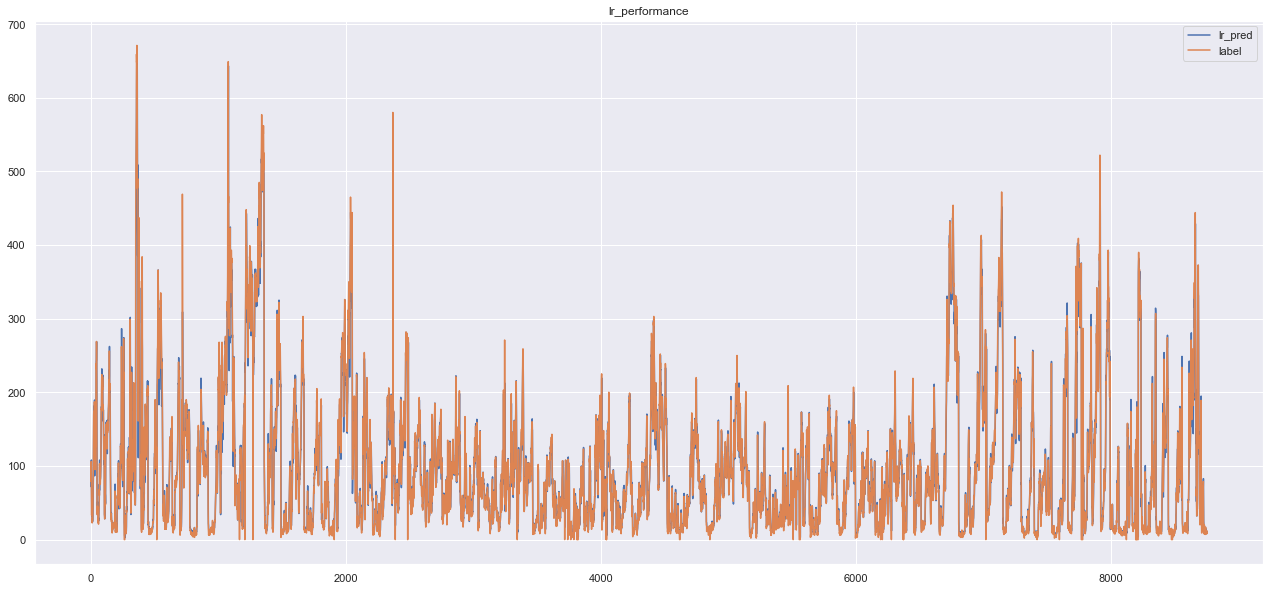

In [121]:
plt.figure(figsize=(22,10))
plt.plot(lr_test_pred[:-1],label='lr_pred')
plt.plot(test_y[:-1],label='label')
plt.legend()
plt.title('lr_performance')
plt.show()

In [122]:
lr_test_mse = mean_squared_error(lr_test_pred[:-1],test_y[:-1])
print('lr_test_mse:',lr_test_mse)

lr_test_mse: 545.326038589955


In [123]:
def model_performance_sc_plot(predictions, labels, title):
    # Get min and max values of the predictions and labels.
    min_val = max(max(predictions), max(labels))
    max_val = min(min(predictions), min(labels))
    # Create dataframe with predicitons and labels.
    performance_df = pd.DataFrame({"True":labels})
    performance_df["Prediction"] = predictions
    # Plot data
    sns.jointplot(y="True", x="Prediction", data=performance_df, kind="reg", height=7)
#     plt.plot([min_val, max_val], [min_val, max_val], 'm--')
    plt.title(title, fontsize=12)
    plt.show()
    plt.savefig(title+'.svg',format='svg')

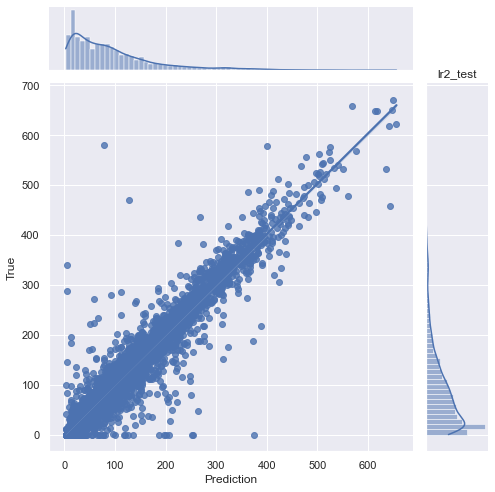

<Figure size 5760x5040 with 0 Axes>

In [124]:
model_performance_sc_plot(list(lr_test_pred[:-1]),list(test_y[:-1]), 'lr2_test')

<Figure size 5760x5040 with 0 Axes>

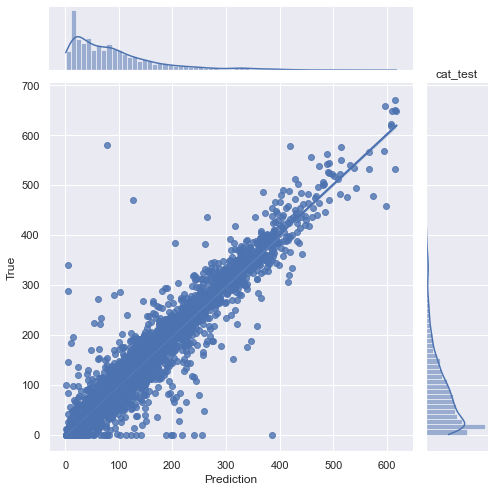

<Figure size 5760x5040 with 0 Axes>

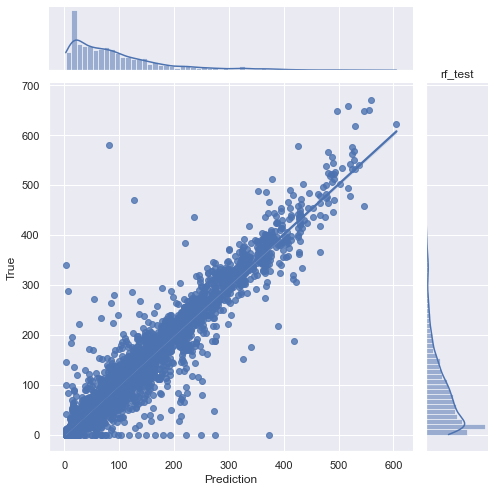

<Figure size 5760x5040 with 0 Axes>

<Figure size 5760x5040 with 0 Axes>

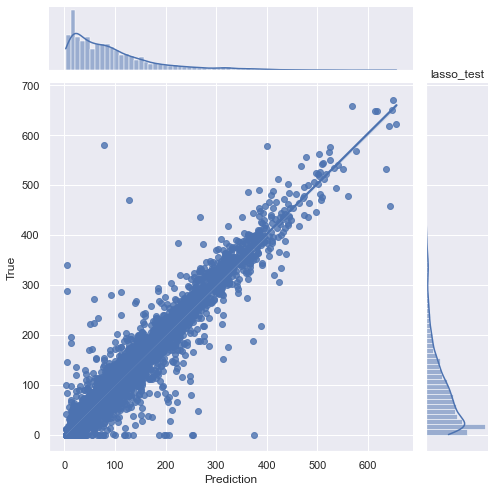

<Figure size 5760x5040 with 0 Axes>

In [125]:
model_performance_sc_plot(list(xgb_pred[:-1]),list(test_y[:-1]), 'xgb_test')
model_performance_sc_plot(list(cat_pred[:-1]),list(test_y[:-1]), 'cat_test')
model_performance_sc_plot(list(rf_pred[:-1]),list(test_y[:-1]), 'rf_test')
model_performance_sc_plot(list(lgb_pred[:-1]),list(test_y[:-1]), 'lgb_test')
model_performance_sc_plot(list(lr_test_pred[:-1]),list(test_y[:-1]), 'lasso_test')

In [126]:
def GetRMSE(y_hat,y_test):
    sum = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
    return  sum

def GetMAE(y_hat,y_test):
    sum = metrics.mean_absolute_error(y_test, y_hat)
    return  sum

def GetMAPE(y_hat,y_test):
    sum = np.mean(np.abs((y_hat - y_test) / y_test)) * 100
    return sum

def GetMAPE_Order(y_hat,y_test):
    #删除y_test 为0元素
    zero_index = np.where(y_test == 0)
    y_hat = np.delete(y_hat,zero_index[0])
    y_test = np.delete(y_test,zero_index[0])
    sum = np.mean(np.abs((y_hat - y_test) / y_test)) * 100
    return sum

In [127]:
from  sklearn import  metrics

xgb_rmse = GetRMSE(xgb_pred[:-1],test_y[:-1])
cat_rmse = GetRMSE(cat_pred[:-1],test_y[:-1])
rf_rmse = GetRMSE(rf_pred[:-1],test_y[:-1])
lgb_rmse = GetRMSE(lgb_pred[:-1],test_y[:-1])
lr_rmse = GetRMSE(lr_test_pred[:-1],test_y[:-1])

xgb_mae = GetMAE(xgb_pred[:-1],test_y[:-1])
cat_mae = GetMAE(cat_pred[:-1],test_y[:-1])
rf_mae = GetMAE(rf_pred[:-1],test_y[:-1])
lgb_mae = GetMAE(lgb_pred[:-1],test_y[:-1])
lr_mae = GetMAE(lr_test_pred[:-1],test_y[:-1])


xgb_mape = GetMAPE_Order(xgb_pred[:-1],test_y[:-1])
cat_mape = GetMAPE_Order(cat_pred[:-1],test_y[:-1])
rf_mape = GetMAPE_Order(rf_pred[:-1],test_y[:-1])
lgb_mape = GetMAPE_Order(lgb_pred[:-1],test_y[:-1])
lr_mape = GetMAPE_Order(lr_test_pred[:-1],test_y[:-1])

In [128]:
print("xgb_performance:")
print("RMSE为",xgb_rmse)
print("MAE为",xgb_mae)
print("MAPE为",xgb_mape)
print("MSE为",xgboost_test_mse)
print("=====================================")

print("cat_performance:")
print("RMSE为",cat_rmse)
print("MAE为",cat_mae)
print("MAPE为",cat_mape)
print("MSE为",catboost_test_mse)
print("=====================================")

print("rf_performance:")
print("RMSE为",rf_rmse)
print("MAE为",rf_mae)
print("MAPE为",rf_mape)
print("MSE为",rf_test_mse)
print("=====================================")

print("lgb_performance:")
print("RMSE为",lgb_rmse)
print("MAE为",lgb_mae)
print("MAPE为",lgb_mape)
print("MSE为",lgb_test_mse)
print("=====================================")


print("lr_performance:")
print("RMSE为",lr_rmse)
print("MAE为",lr_mae)
print("MAPE为",lr_mape)
print("MSE为",lr_test_mse)
print("=====================================")

xgb_performance:
RMSE为 25.964097741991857
MAE为 13.632357736310444
MAPE为 23.04498632926373
MSE为 674.1343715557066
cat_performance:
RMSE为 23.58712188711414
MAE为 12.741559084490534
MAPE为 23.930088833081992
MSE为 556.3523189175789
rf_performance:
RMSE为 23.741158937747556
MAE为 12.522260703825957
MAPE为 23.138959317502994
MSE为 563.6426277073906
lgb_performance:
RMSE为 23.64501974674736
MAE为 12.502207309243328
MAPE为 23.513869560919083
MSE为 559.0869588240724
lr_performance:
RMSE为 23.352216995179603
MAE为 12.387562922570929
MAPE为 22.522940249334734
MSE为 545.326038589955


In [129]:
validation_size

28032

In [130]:
num_validation = train_size - validation_size

In [131]:
num_validation

7008

In [132]:
x

array([[ 1.810000e+02, -7.000000e+00, -5.000000e+00, ...,  2.825616e+06,
         2.462868e+06,  2.146689e+06],
       [ 1.380000e+02, -7.000000e+00, -5.000000e+00, ...,  3.741588e+06,
         3.482736e+06,  3.241792e+06],
       [ 1.090000e+02, -7.000000e+00, -6.000000e+00, ...,  5.208999e+06,
         4.575861e+06,  4.019679e+06],
       ...,
       [ 1.000000e+01, -2.200000e+01, -3.000000e+00, ...,  6.400000e+02,
         8.000000e+02,  1.000000e+03],
       [ 8.000000e+00, -2.200000e+01, -4.000000e+00, ...,  8.000000e+02,
         6.400000e+02,  5.120000e+02],
       [ 1.200000e+01, -2.100000e+01, -3.000000e+00, ...,  1.000000e+03,
         1.000000e+03,  1.000000e+03]])

In [133]:
x.shape

(43797, 285)

In [134]:
train_x

array([[ 1.810000e+02, -7.000000e+00, -5.000000e+00, ...,  2.825616e+06,
         2.462868e+06,  2.146689e+06],
       [ 1.380000e+02, -7.000000e+00, -5.000000e+00, ...,  3.741588e+06,
         3.482736e+06,  3.241792e+06],
       [ 1.090000e+02, -7.000000e+00, -6.000000e+00, ...,  5.208999e+06,
         4.575861e+06,  4.019679e+06],
       ...,
       [ 2.400000e+01, -2.000000e+01,  7.000000e+00, ...,  9.200000e+03,
         1.058000e+04,  1.216700e+04],
       [ 5.300000e+01, -2.000000e+01,  7.000000e+00, ...,  1.058000e+04,
         9.200000e+03,  8.000000e+03],
       [ 6.500000e+01, -2.000000e+01,  6.000000e+00, ...,  1.324800e+04,
         1.269600e+04,  1.216700e+04]])

In [135]:
train_x.shape

(35040, 285)

In [136]:
2*num_validation

14016

In [137]:
3*num_validation

21024

In [138]:
4*num_validation

28032

In [139]:
train_size

35040

In [140]:
k_fold_size = int(0.2*len(train_x))

In [141]:
k_fold_size

7008

In [142]:
train_y

array([138.0, 109.0, 105.0, ..., 53.0, 65.0, 70.0], dtype=object)

In [143]:
train_y.shape

(35040,)

In [144]:
5*k_fold_size

35040

In [145]:
train_1_x = train_x[:-k_fold_size]
train_1_y = train_y[:-k_fold_size]
validation_1_x = train_x[-k_fold_size:]
validation_1_y = train_y[-k_fold_size:]


train_2_x = np.concatenate((train_x[:-2*k_fold_size],train_x[-k_fold_size:]),axis=0)
train_2_y = np.concatenate((train_y[:-2*k_fold_size],train_y[-k_fold_size:]))
validation_2_x = train_x[-2*k_fold_size:-k_fold_size]
validation_2_y = train_y[-2*k_fold_size:-k_fold_size]

train_3_x = np.concatenate((train_x[:-3*k_fold_size],train_x[-2*k_fold_size:]),axis=0)
train_3_y = np.concatenate((train_y[:-3*k_fold_size],train_y[-2*k_fold_size:]))
validation_3_x = train_x[-3*k_fold_size:-2*k_fold_size]
validation_3_y = train_y[-3*k_fold_size:-2*k_fold_size]

train_4_x = np.concatenate((train_x[:-4*k_fold_size],train_x[-3*k_fold_size:]),axis=0)
train_4_y = np.concatenate((train_y[:-4*k_fold_size],train_y[-3*k_fold_size:]))
validation_4_x = train_x[-4*k_fold_size:-3*k_fold_size]
validation_4_y = train_y[-4*k_fold_size:-3*k_fold_size]

train_5_x = np.concatenate((train_x[:-5*k_fold_size],train_x[-4*k_fold_size:]),axis=0)
train_5_y = np.concatenate((train_y[:-5*k_fold_size],train_y[-4*k_fold_size:]))
validation_5_x = train_x[-5*k_fold_size:-4*k_fold_size]
validation_5_y = train_y[-5*k_fold_size:-4*k_fold_size]

In [146]:
print(train_1_x.shape)
print(train_2_x.shape)
print(train_3_x.shape)
print(train_4_x.shape)
print(train_5_x.shape)


(28032, 285)
(28032, 285)
(28032, 285)
(28032, 285)
(28032, 285)


In [147]:
from xgboost import XGBRegressor
from xgboost import plot_importance

xgb_model1 = XGBRegressor(max_depth=9, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=0)
xgb_model1.fit(train_1_x, 
              train_1_y, 
              eval_metric="rmse", 
              eval_set=[(validation_1_x,validation_1_y)], 
              verbose=20, 
              early_stopping_rounds=20)

[0]	validation_0-rmse:83.36321
[20]	validation_0-rmse:23.89982
[40]	validation_0-rmse:23.74522
[60]	validation_0-rmse:23.58522
[80]	validation_0-rmse:23.51141
[100]	validation_0-rmse:23.38031
[120]	validation_0-rmse:23.34242
[140]	validation_0-rmse:23.27327
[160]	validation_0-rmse:23.22309
[179]	validation_0-rmse:23.28076


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=9,
             min_child_weight=1000, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [148]:
xgb_model2 = XGBRegressor(max_depth=9, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=1)
xgb_model2.fit(train_2_x, 
              train_2_y, 
              eval_metric="rmse", 
              eval_set=[(validation_2_x,validation_2_y)], 
              verbose=20, 
              early_stopping_rounds=20)

xgb_model3 = XGBRegressor(max_depth=9, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=2)
xgb_model3.fit(train_3_x, 
              train_3_y, 
              eval_metric="rmse", 
              eval_set=[(validation_3_x,validation_3_y)], 
              verbose=20, 
              early_stopping_rounds=20)

xgb_model4 = XGBRegressor(max_depth=9, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=3)
xgb_model4.fit(train_4_x, 
              train_4_y, 
              eval_metric="rmse", 
              eval_set=[(validation_4_x,validation_4_y)], 
              verbose=20, 
              early_stopping_rounds=20)

xgb_model5 = XGBRegressor(max_depth=9, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=4)
xgb_model5.fit(train_5_x, 
              train_5_y, 
              eval_metric="rmse", 
              eval_set=[(validation_5_x,validation_5_y)], 
              verbose=20, 
              early_stopping_rounds=20)

[0]	validation_0-rmse:103.50178
[20]	validation_0-rmse:38.58084
[40]	validation_0-rmse:37.98473
[60]	validation_0-rmse:37.81590
[80]	validation_0-rmse:37.31421
[100]	validation_0-rmse:36.95842
[120]	validation_0-rmse:36.69175
[140]	validation_0-rmse:36.56051
[160]	validation_0-rmse:36.32829
[180]	validation_0-rmse:36.22293
[200]	validation_0-rmse:36.06008
[220]	validation_0-rmse:35.91135
[240]	validation_0-rmse:35.84408
[260]	validation_0-rmse:35.76496
[280]	validation_0-rmse:35.60548
[300]	validation_0-rmse:35.47975
[316]	validation_0-rmse:35.45879
[0]	validation_0-rmse:97.31772
[20]	validation_0-rmse:32.79137
[40]	validation_0-rmse:32.27876
[60]	validation_0-rmse:32.20861
[80]	validation_0-rmse:31.79898
[100]	validation_0-rmse:31.74141
[120]	validation_0-rmse:31.56717
[140]	validation_0-rmse:31.49390
[160]	validation_0-rmse:31.37856
[180]	validation_0-rmse:31.29888
[200]	validation_0-rmse:31.18940
[220]	validation_0-rmse:31.08144
[240]	validation_0-rmse:31.03581
[257]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=9,
             min_child_weight=1000, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=4,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [149]:
xgb_validation1_pred = xgb_model1.predict(validation_1_x)
xgb_validation2_pred = xgb_model2.predict(validation_2_x)
xgb_validation3_pred = xgb_model3.predict(validation_3_x)
xgb_validation4_pred = xgb_model4.predict(validation_4_x)
xgb_validation5_pred = xgb_model5.predict(validation_5_x)

In [150]:
import catboost
from catboost import Pool
from catboost import CatBoostRegressor

In [151]:
catboost_model1 = CatBoostRegressor(
    iterations=500,
    max_ctr_complexity=4,
    random_seed=0,
    od_type='Iter',
    od_wait=25,
    verbose=50,
    depth=9
)

catboost_model1.fit(train_1_x, 
              train_1_y,
    eval_set=(validation_1_x, validation_1_y)
)

catboost_model2 = CatBoostRegressor(
    iterations=500,
    max_ctr_complexity=4,
    random_seed=1,
    od_type='Iter',
    od_wait=25,
    verbose=50,
    depth=9
)

catboost_model2.fit(train_2_x, 
              train_2_y,
    eval_set=(validation_2_x, validation_2_y)
)

catboost_model3 = CatBoostRegressor(
    iterations=500,
    max_ctr_complexity=4,
    random_seed=2,
    od_type='Iter',
    od_wait=25,
    verbose=50,
    depth=9
)

catboost_model3.fit(train_3_x, 
              train_3_y,
    eval_set=(validation_3_x, validation_3_y)
)

catboost_model4 = CatBoostRegressor(
    iterations=500,
    max_ctr_complexity=4,
    random_seed=3,
    od_type='Iter',
    od_wait=25,
    verbose=50,
    depth=9
)

catboost_model4.fit(train_4_x, 
              train_4_y,
    eval_set=(validation_4_x, validation_4_y)
)

catboost_model5 = CatBoostRegressor(
    iterations=500,
    max_ctr_complexity=4,
    random_seed=4,
    od_type='Iter',
    od_wait=25,
    verbose=50,
    depth=9
)

catboost_model5.fit(train_5_x, 
              train_5_y,
    eval_set=(validation_5_x, validation_5_y)
)


Learning rate set to 0.13324
0:	learn: 84.3782830	test: 68.8810937	best: 68.8810937 (0)	total: 192ms	remaining: 1m 35s
50:	learn: 24.1421732	test: 21.5055526	best: 21.5055526 (50)	total: 8.42s	remaining: 1m 14s
100:	learn: 22.2244734	test: 21.2862650	best: 21.2736643 (97)	total: 16.7s	remaining: 1m 5s
150:	learn: 20.8738817	test: 21.1841596	best: 21.1787071 (147)	total: 24.8s	remaining: 57.4s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 21.16051185
bestIteration = 170

Shrink model to first 171 iterations.
Learning rate set to 0.13324
0:	learn: 79.1415976	test: 91.6290562	best: 91.6290562 (0)	total: 212ms	remaining: 1m 45s
50:	learn: 22.7870705	test: 31.9373387	best: 31.9373387 (50)	total: 10.3s	remaining: 1m 31s
100:	learn: 21.0955631	test: 31.6446642	best: 31.6345816 (91)	total: 20s	remaining: 1m 19s
150:	learn: 19.8085852	test: 31.6265079	best: 31.6091335 (140)	total: 29.3s	remaining: 1m 7s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 31.609

In [152]:
cat_validation1_pred = catboost_model1.predict(validation_1_x)
cat_validation2_pred = catboost_model2.predict(validation_2_x)
cat_validation3_pred = catboost_model3.predict(validation_3_x)
cat_validation4_pred = catboost_model4.predict(validation_4_x)
cat_validation5_pred = catboost_model5.predict(validation_5_x)

In [153]:
from sklearn.ensemble import RandomForestRegressor

In [154]:
rf_model1 = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=0, n_jobs=-1)
rf_model1.fit(train_1_x, train_1_y)

rf_model2 = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=1, n_jobs=-1)
rf_model2.fit(train_2_x, train_2_y)

rf_model3 = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=2, n_jobs=-1)
rf_model3.fit(train_3_x, train_3_y)

rf_model4 = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=3, n_jobs=-1)
rf_model4.fit(train_4_x, train_4_y)

rf_model5 = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=4, n_jobs=-1)
rf_model5.fit(train_5_x, train_5_y)

RandomForestRegressor(max_depth=9, n_estimators=500, n_jobs=-1, random_state=4)

In [155]:
rf_validation1_pred = rf_model1.predict(validation_1_x)
rf_validation2_pred = rf_model2.predict(validation_2_x)
rf_validation3_pred = rf_model3.predict(validation_3_x)
rf_validation4_pred = rf_model4.predict(validation_4_x)
rf_validation5_pred = rf_model5.predict(validation_5_x)

In [156]:
import lightgbm as lgb

In [157]:
params = {
    "objective" : "regression",
    "metric" : "rmse",
    "num_leaves" : 40,
    "learning_rate" : 0.004,
    "bagging_fraction" : 0.6,
    "feature_fraction" : 0.6,
    "bagging_frequency" : 6,
    "bagging_seed" : 42,
    "verbosity" : -1,
    "seed": 42
}
    
lgtrain1 = lgb.Dataset(train_1_x, label=train_1_y)
lgval1 = lgb.Dataset(validation_1_x, label=validation_1_y)
evals_result1 = {}
lgb_model1 = lgb.train(params, lgtrain1, 5000, 
                  valid_sets=[lgtrain1, lgval1], 
                  early_stopping_rounds=100, 
                  verbose_eval=150, 
                  evals_result=evals_result1)

[LightGBM] [Warning] Unknown parameter: bagging_frequency
Training until validation scores don't improve for 100 rounds
[150]	training's rmse: 56.8418	valid_1's rmse: 46.2262
[300]	training's rmse: 38.1573	valid_1's rmse: 30.7663
[450]	training's rmse: 29.9363	valid_1's rmse: 24.3562
[600]	training's rmse: 26.5232	valid_1's rmse: 22.0848
[750]	training's rmse: 24.9713	valid_1's rmse: 21.3841
[900]	training's rmse: 24.0902	valid_1's rmse: 21.1837
[1050]	training's rmse: 23.4877	valid_1's rmse: 21.1426
[1200]	training's rmse: 23.0183	valid_1's rmse: 21.1407
Early stopping, best iteration is:
[1248]	training's rmse: 22.8714	valid_1's rmse: 21.1355


In [158]:
lgtrain2 = lgb.Dataset(train_2_x, label=train_2_y)
lgval2 = lgb.Dataset(validation_2_x, label=validation_2_y)
evals_result2 = {}
lgb_model2 = lgb.train(params, lgtrain2, 5000, 
                  valid_sets=[lgtrain2, lgval2], 
                  early_stopping_rounds=100, 
                  verbose_eval=150, 
                  evals_result=evals_result2)

lgtrain3 = lgb.Dataset(train_3_x, label=train_3_y)
lgval3 = lgb.Dataset(validation_3_x, label=validation_3_y)
evals_result3 = {}
lgb_model3 = lgb.train(params, lgtrain3, 5000, 
                  valid_sets=[lgtrain3, lgval3], 
                  early_stopping_rounds=100, 
                  verbose_eval=150, 
                  evals_result=evals_result3)

lgtrain4 = lgb.Dataset(train_4_x, label=train_4_y)
lgval4 = lgb.Dataset(validation_4_x, label=validation_4_y)
evals_result4 = {}
lgb_model4 = lgb.train(params, lgtrain4, 5000, 
                  valid_sets=[lgtrain4, lgval4], 
                  early_stopping_rounds=100, 
                  verbose_eval=150, 
                  evals_result=evals_result4)

lgtrain5 = lgb.Dataset(train_5_x, label=train_5_y)
lgval5 = lgb.Dataset(validation_5_x, label=validation_5_y)
evals_result5 = {}
lgb_model5 = lgb.train(params, lgtrain5, 5000, 
                  valid_sets=[lgtrain5, lgval5], 
                  early_stopping_rounds=100, 
                  verbose_eval=150, 
                  evals_result=evals_result5)

Training until validation scores don't improve for 100 rounds
[150]	training's rmse: 53.2064	valid_1's rmse: 62.9612
[300]	training's rmse: 35.6646	valid_1's rmse: 44.1719
[450]	training's rmse: 27.9503	valid_1's rmse: 36.2718
[600]	training's rmse: 24.7796	valid_1's rmse: 33.3406
[750]	training's rmse: 23.392	valid_1's rmse: 32.227
[900]	training's rmse: 22.6312	valid_1's rmse: 31.8063
[1050]	training's rmse: 22.1034	valid_1's rmse: 31.6853
[1200]	training's rmse: 21.691	valid_1's rmse: 31.626
[1350]	training's rmse: 21.2798	valid_1's rmse: 31.5841
[1500]	training's rmse: 20.9239	valid_1's rmse: 31.5598
[1650]	training's rmse: 20.6349	valid_1's rmse: 31.5677
Early stopping, best iteration is:
[1615]	training's rmse: 20.6978	valid_1's rmse: 31.5519
Training until validation scores don't improve for 100 rounds
[150]	training's rmse: 54.4595	valid_1's rmse: 57.075
[300]	training's rmse: 36.4015	valid_1's rmse: 39.3455
[450]	training's rmse: 28.4401	valid_1's rmse: 32.1255
[600]	training'

In [159]:
lgb_validation1_pred = lgb_model1.predict(validation_1_x)
lgb_validation2_pred = lgb_model2.predict(validation_2_x)
lgb_validation3_pred = lgb_model3.predict(validation_3_x)
lgb_validation4_pred = lgb_model4.predict(validation_4_x)
lgb_validation5_pred = lgb_model5.predict(validation_5_x)

In [160]:
from sklearn.linear_model import Lasso
lr_scaler1 = MinMaxScaler()
lr_scaler1.fit(train_1_x)
lr_train1 = lr_scaler1.transform(train_1_x)
lr_val1 = lr_scaler1.transform(validation_1_x)

lr_model1 = Lasso(alpha=0.001)
lr_model1.fit(lr_train1, train_1_y)

Lasso(alpha=0.001)

In [161]:
lr_scaler2 = MinMaxScaler()
lr_scaler2.fit(train_2_x)
lr_train2 = lr_scaler2.transform(train_2_x)
lr_val2 = lr_scaler2.transform(validation_2_x)

lr_model2 = Lasso(alpha=0.001)
lr_model2.fit(lr_train2, train_2_y)

lr_scaler3 = MinMaxScaler()
lr_scaler3.fit(train_3_x)
lr_train3 = lr_scaler3.transform(train_3_x)
lr_val3 = lr_scaler3.transform(validation_3_x)

lr_model3 = Lasso(alpha=0.001)
lr_model3.fit(lr_train3, train_3_y)

lr_scaler4 = MinMaxScaler()
lr_scaler4.fit(train_4_x)
lr_train4 = lr_scaler4.transform(train_4_x)
lr_val4 = lr_scaler4.transform(validation_4_x)

lr_model4 = Lasso(alpha=0.001)
lr_model4.fit(lr_train4, train_4_y)

lr_scaler5 = MinMaxScaler()
lr_scaler5.fit(train_5_x)
lr_train5 = lr_scaler5.transform(train_5_x)
lr_val5 = lr_scaler5.transform(validation_5_x)

lr_model5 = Lasso(alpha=0.001)
lr_model5.fit(lr_train5, train_5_y)

Lasso(alpha=0.001)

In [162]:
lr_validation1_pred = lr_model1.predict(lr_val1)
lr_validation2_pred = lr_model2.predict(lr_val2)
lr_validation3_pred = lr_model3.predict(lr_val3)
lr_validation4_pred = lr_model4.predict(lr_val4)
lr_validation5_pred = lr_model5.predict(lr_val5)

In [163]:
lr_xgb_train = np.concatenate((xgb_validation5_pred,xgb_validation4_pred,xgb_validation3_pred,xgb_validation2_pred,xgb_validation1_pred),axis=0)

lr_cat_train = np.concatenate((cat_validation5_pred,cat_validation4_pred,cat_validation3_pred,cat_validation2_pred,cat_validation1_pred),axis=0)

lr_rf_train = np.concatenate((rf_validation5_pred,rf_validation4_pred,rf_validation3_pred,rf_validation2_pred,rf_validation1_pred),axis=0)

lr_lgb_train = np.concatenate((lgb_validation5_pred,lgb_validation4_pred,lgb_validation3_pred,lgb_validation2_pred,lgb_validation1_pred),axis=0)

lr_lr_train = np.concatenate((lr_validation5_pred,lr_validation4_pred,lr_validation3_pred,lr_validation2_pred,lr_validation1_pred),axis=0)


In [164]:
print(lr_xgb_train.shape)
print(lr_cat_train.shape)
print(lr_rf_train.shape)
print(lr_lgb_train.shape)
print(lr_lr_train.shape)


(35040,)
(35040,)
(35040,)
(35040,)
(35040,)


In [165]:
lr_train_y = np.concatenate((validation_5_y,validation_4_y,validation_3_y,validation_2_y,validation_1_y),axis=0)

In [166]:
lr_train_y.shape

(35040,)

In [167]:
lr_train_x = np.concatenate((lr_xgb_train.reshape(-1,1),lr_cat_train.reshape(-1,1),lr_rf_train.reshape(-1,1),lr_lgb_train.reshape(-1,1),lr_lr_train.reshape(-1,1)),axis=1)

In [168]:
lr_train_x.shape

(35040, 5)

In [169]:
from sklearn.linear_model import Ridge
lr_model = Ridge(alpha=0.001)

In [170]:
lr_model.fit(lr_train_x,lr_train_y)

Ridge(alpha=0.001)

In [171]:
test_x

array([[ 7.00000e+01, -2.00000e+01,  6.00000e+00, ...,  6.74160e+04,
         3.05280e+04,  1.38240e+04],
       [ 7.90000e+01, -1.80000e+01,  3.00000e+00, ...,  2.23925e+05,
         1.82585e+05,  1.48877e+05],
       [ 9.20000e+01, -1.80000e+01,  4.00000e+00, ...,  3.18500e+05,
         2.95750e+05,  2.74625e+05],
       ...,
       [ 1.00000e+01, -2.20000e+01, -3.00000e+00, ...,  6.40000e+02,
         8.00000e+02,  1.00000e+03],
       [ 8.00000e+00, -2.20000e+01, -4.00000e+00, ...,  8.00000e+02,
         6.40000e+02,  5.12000e+02],
       [ 1.20000e+01, -2.10000e+01, -3.00000e+00, ...,  1.00000e+03,
         1.00000e+03,  1.00000e+03]])

In [172]:
test_x.shape

(8757, 285)

In [173]:
xgb_test_1_x = xgb_model1.predict(test_x)
xgb_test_2_x = xgb_model2.predict(test_x)
xgb_test_3_x = xgb_model3.predict(test_x)
xgb_test_4_x = xgb_model4.predict(test_x)
xgb_test_5_x = xgb_model5.predict(test_x)



In [174]:
xgb_test_1_x

array([69.17278 , 90.86108 , 96.14461 , ..., 11.630074,  9.409865,
       12.980012], dtype=float32)

In [175]:
xgb_test_2_x

array([65.9445  , 89.235405, 96.59592 , ..., 10.069625, 10.471737,
       11.801512], dtype=float32)

In [176]:
xgb_test_x = np.concatenate((xgb_test_1_x.reshape(-1,1),xgb_test_2_x.reshape(-1,1),xgb_test_3_x.reshape(-1,1),xgb_test_4_x.reshape(-1,1),xgb_test_5_x.reshape(-1,1)),axis=1)

In [177]:
xgb_test_x.shape

(8757, 5)

In [178]:
xgb_test_x = np.average(xgb_test_x, axis=1)  # 按行求均值

In [179]:
xgb_test_x

array([67.38977  , 86.38839  , 94.41747  , ..., 11.7267475, 10.0464115,
       13.458773 ], dtype=float32)

In [180]:
from  sklearn import  metrics
xgb_rmse = GetRMSE(xgb_test_x[:-1],test_y[:-1])
xgb_mae = GetMAE(xgb_test_x[:-1],test_y[:-1])
xgb_mape = GetMAPE_Order(xgb_test_x[:-1],test_y[:-1])
xgb_smape = smape(xgb_test_x[:-1],test_y[:-1])
xgb_test_mse = mean_squared_error(xgb_test_x[:-1],test_y[:-1])


print("xgb_performance:")
print("RMSE为",xgb_rmse)
print("MAE为",xgb_mae)
print("MAPE为",xgb_mape)
print("MSE为",xgb_test_mse)
print("SMAPE为",xgb_smape)


xgb_performance:
RMSE为 26.20700746416447
MAE为 13.466083508075073
MAPE为 22.69702896525305
MSE为 686.8072402267721
SMAPE为 20.508928511280452


In [181]:
xgb_test_x.shape

(8757,)

In [182]:
cat_test_1_x = catboost_model1.predict(test_x)
cat_test_2_x = catboost_model2.predict(test_x)
cat_test_3_x = catboost_model3.predict(test_x)
cat_test_4_x = catboost_model4.predict(test_x)
cat_test_5_x = catboost_model5.predict(test_x)

In [183]:
cat_test_x = np.concatenate((cat_test_1_x.reshape(-1,1),cat_test_2_x.reshape(-1,1),cat_test_3_x.reshape(-1,1),cat_test_4_x.reshape(-1,1),cat_test_5_x.reshape(-1,1)),axis=1)

In [184]:
cat_test_x = np.average(cat_test_x, axis=1)  # 按行求均值

In [185]:
cat_test_x 

cat_rmse = GetRMSE(cat_test_x[:-1],test_y[:-1])
cat_mae = GetMAE(cat_test_x[:-1],test_y[:-1])
cat_mape = GetMAPE_Order(cat_test_x[:-1],test_y[:-1])
cat_smape = smape(cat_test_x[:-1],test_y[:-1])
cat_test_mse = mean_squared_error(cat_test_x[:-1],test_y[:-1])


print("cat_performance:")
print("RMSE为",cat_rmse)
print("MAE为",cat_mae)
print("MAPE为",cat_mape)
print("MSE为",cat_test_mse)
print("SMAPE为",cat_smape)


cat_performance:
RMSE为 23.435965689074116
MAE为 12.55365280327296
MAPE为 23.34790983210947
MSE为 549.2444877794592
SMAPE为 20.68294616472841


In [186]:
cat_test_x.shape

(8757,)

In [187]:
rf_test_1_x = rf_model1.predict(test_x)
rf_test_2_x = rf_model2.predict(test_x)
rf_test_3_x = rf_model3.predict(test_x)
rf_test_4_x = rf_model4.predict(test_x)
rf_test_5_x = rf_model5.predict(test_x)

In [188]:
rf_test_x = np.concatenate((rf_test_1_x.reshape(-1,1),rf_test_2_x.reshape(-1,1),rf_test_3_x.reshape(-1,1),rf_test_4_x.reshape(-1,1),rf_test_5_x.reshape(-1,1)),axis=1)

In [189]:
rf_test_x = np.average(rf_test_x, axis=1)  # 按行求均值

In [190]:
rf_test_x

array([75.07484643, 82.65014336, 92.47077689, ..., 12.44463911,
       12.15348986, 13.09874303])

In [191]:
rf_rmse = GetRMSE(rf_test_x[:-1],test_y[:-1])
rf_mae = GetMAE(rf_test_x[:-1],test_y[:-1])
rf_mape = GetMAPE_Order(rf_test_x[:-1],test_y[:-1])
rf_smape = smape(rf_test_x[:-1],test_y[:-1])
rf_test_mse = mean_squared_error(rf_test_x[:-1],test_y[:-1])


print("rf_performance:")
print("RMSE为",rf_rmse)
print("MAE为",rf_mae)
print("MAPE为",rf_mape)
print("MSE为",rf_test_mse)
print("SMAPE为",rf_smape)


rf_performance:
RMSE为 23.73030312198425
MAE为 12.449903118897698
MAPE为 23.03115502010982
MSE为 563.1272862612554
SMAPE为 20.503063518473716


In [192]:
rf_test_x.shape

(8757,)

In [193]:
lgb_test_1_x = lgb_model1.predict(test_x)
lgb_test_2_x = lgb_model2.predict(test_x)
lgb_test_3_x = lgb_model3.predict(test_x)
lgb_test_4_x = lgb_model4.predict(test_x)
lgb_test_5_x = lgb_model5.predict(test_x)

In [194]:
lgb_test_x = np.concatenate((lgb_test_1_x.reshape(-1,1),lgb_test_2_x.reshape(-1,1),lgb_test_3_x.reshape(-1,1),lgb_test_4_x.reshape(-1,1),lgb_test_5_x.reshape(-1,1)),axis=1)

In [195]:
lgb_test_x = np.average(lgb_test_x, axis=1)  # 按行求均值

In [196]:
lgb_test_x
lgb_rmse = GetRMSE(lgb_test_x[:-1],test_y[:-1])
lgb_mae = GetMAE(lgb_test_x[:-1],test_y[:-1])
lgb_mape = GetMAPE_Order(lgb_test_x[:-1],test_y[:-1])
lgb_smape = smape(lgb_test_x[:-1],test_y[:-1])
lgb_test_mse = mean_squared_error(lgb_test_x[:-1],test_y[:-1])


print("lgb_performance:")
print("RMSE为",lgb_rmse)
print("MAE为",lgb_mae)
print("MAPE为",lgb_mape)
print("MSE为",lgb_test_mse)
print("SMAPE为",lgb_smape)


lgb_performance:
RMSE为 23.373965092249406
MAE为 12.35138215352939
MAPE为 23.05707827605724
MSE为 546.3422441336937
SMAPE为 20.345473532336257


In [197]:
lgb_test_x.shape

(8757,)

In [198]:
lr_test_1_x = lr_model1.predict(lr_scaler1.transform(test_x))
lr_test_2_x = lr_model2.predict(lr_scaler2.transform(test_x))
lr_test_3_x = lr_model3.predict(lr_scaler3.transform(test_x))
lr_test_4_x = lr_model4.predict(lr_scaler4.transform(test_x))
lr_test_5_x = lr_model5.predict(lr_scaler5.transform(test_x))


In [199]:
lr_test_x = np.concatenate((lr_test_1_x.reshape(-1,1),lr_test_2_x.reshape(-1,1),lr_test_3_x.reshape(-1,1),lr_test_4_x.reshape(-1,1),lr_test_5_x.reshape(-1,1)),axis=1)

In [200]:
lr_test_x = np.average(lr_test_x, axis=1)  # 按行求均值

In [201]:
lr_test_x.shape

lr_rmse = GetRMSE(lr_test_x[:-1],test_y[:-1])
lr_mae = GetMAE(lr_test_x[:-1],test_y[:-1])
lr_mape = GetMAPE_Order(lr_test_x[:-1],test_y[:-1])
lr_smape = smape(lr_test_x[:-1],test_y[:-1])
lr_test_mse = mean_squared_error(lr_test_x[:-1],test_y[:-1])


print("lr_performance:")
print("RMSE为",lr_rmse)
print("MAE为",lr_mae)
print("MAPE为",lr_mape)
print("MSE为",lr_test_mse)
print("SMAPE为",lr_smape)

lr_performance:
RMSE为 23.686594762118727
MAE为 12.488507912903806
MAPE为 23.117895600559642
MSE为 561.0547714248303
SMAPE为 20.640576716704825


In [202]:
lr_lr_test_x = np.concatenate((xgb_test_x.reshape(-1,1),cat_test_x.reshape(-1,1),rf_test_x.reshape(-1,1),lgb_test_x.reshape(-1,1),lr_test_x.reshape(-1,1)),axis=1)

In [203]:
lr_lr_test_x.shape

(8757, 5)

In [204]:
lr_model


Ridge(alpha=0.001)

In [205]:
lr_test_predict = lr_model.predict(lr_lr_test_x)

In [206]:
lr_test_predict.shape

(8757,)

In [207]:
lr_rmse = GetRMSE(lr_test_predict[:-1],test_y[:-1])
lr_mae = GetMAE(lr_test_predict[:-1],test_y[:-1])
lr_mape = GetMAPE_Order(lr_test_predict[:-1],test_y[:-1])
lr_mse = mean_squared_error(lr_test_predict[:-1],test_y[:-1])
lr_smape = smape(lr_test_predict[:-1],test_y[:-1])

print("lr_performance:")
print("RMSE为",lr_rmse)
print("MAE为",lr_mae)
print("MAPE为",lr_mape)
print("MSE为",lr_mse)
print("SMAPE为",lr_smape)

print("=====================================")

lr_performance:
RMSE为 23.24309782926297
MAE为 12.278070270884166
MAPE为 22.126541049538435
MSE为 540.2415967006891
SMAPE为 20.02145649624132


In [208]:

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.00001)

In [209]:
lasso_model.fit(lr_train_x,lr_train_y)

Lasso(alpha=1e-05)

In [210]:
lasso_test_predict = lasso_model.predict(lr_lr_test_x)

In [211]:
from  sklearn import  metrics


lasso_rmse = GetRMSE(lasso_test_predict[:-1],test_y[:-1])
lasso_mae = GetMAE(lasso_test_predict[:-1],test_y[:-1])
lasso_mape = GetMAPE_Order(lasso_test_predict[:-1],test_y[:-1])
lasso_mse = mean_squared_error(lasso_test_predict[:-1],test_y[:-1])
lasso_smape = smape(lasso_test_predict[:-1],test_y[:-1])




print("lasso_performance:")
print("RMSE为",lasso_rmse)
print("MAE为",lasso_mae)
print("MAPE为",lasso_mape)
print("MSE为",lasso_mse)
print("SMAPE为",lasso_smape)


lasso_performance:
RMSE为 23.24330692310498
MAE为 12.278298398626818
MAPE为 22.126759910758746
MSE为 540.25131672166
SMAPE为 20.02167266196709


In [212]:
from sklearn.neighbors import KNeighborsRegressor

In [213]:
knn_scaler1 = MinMaxScaler()
knn_scaler1.fit(train_1_x)
knn_train1 = knn_scaler1.transform(train_1_x)
knn_val1 = knn_scaler1.transform(validation_1_x)

knn_scaler2 = MinMaxScaler()
knn_scaler2.fit(train_2_x)
knn_train2 = knn_scaler2.transform(train_2_x)
knn_val2 = knn_scaler2.transform(validation_2_x)

knn_scaler3 = MinMaxScaler()
knn_scaler3.fit(train_3_x)
knn_train3 = knn_scaler3.transform(train_3_x)
knn_val3 = knn_scaler3.transform(validation_3_x)

knn_scaler4 = MinMaxScaler()
knn_scaler4.fit(train_4_x)
knn_train4 = knn_scaler4.transform(train_4_x)
knn_val4 = knn_scaler4.transform(validation_4_x)

knn_scaler5 = MinMaxScaler()
knn_scaler5.fit(train_5_x)
knn_train5 = knn_scaler5.transform(train_5_x)
knn_val5 = knn_scaler5.transform(validation_5_x)




In [214]:
knn_model1 = KNeighborsRegressor(n_neighbors=50, leaf_size=15, n_jobs=-1)
knn_model1.fit(knn_train1, train_1_y)

knn_model2 = KNeighborsRegressor(n_neighbors=50, leaf_size=15, n_jobs=-1)
knn_model2.fit(knn_train2, train_2_y)

knn_model3 = KNeighborsRegressor(n_neighbors=50, leaf_size=15, n_jobs=-1)
knn_model3.fit(knn_train3, train_3_y)

knn_model4 = KNeighborsRegressor(n_neighbors=50, leaf_size=15, n_jobs=-1)
knn_model4.fit(knn_train4, train_4_y)

knn_model5 = KNeighborsRegressor(n_neighbors=50, leaf_size=15, n_jobs=-1)
knn_model5.fit(knn_train5, train_5_y)

KNeighborsRegressor(leaf_size=15, n_jobs=-1, n_neighbors=50)

In [215]:
# knn_model = KNeighborsRegressor(n_neighbors=50, leaf_size=15, n_jobs=-1)
# knn_model.fit(knn_train, train_data_y)

In [216]:
knn_validation1_pred = knn_model1.predict(knn_val1)
knn_validation2_pred = knn_model2.predict(knn_val2)
knn_validation3_pred = knn_model3.predict(knn_val3)
knn_validation4_pred = knn_model4.predict(knn_val4)
knn_validation5_pred = knn_model5.predict(knn_val5)

In [217]:
knn_test_1_x = knn_model1.predict(knn_scaler1.transform(test_x))
knn_test_2_x = knn_model2.predict(knn_scaler2.transform(test_x))
knn_test_3_x = knn_model3.predict(knn_scaler3.transform(test_x))
knn_test_4_x = knn_model4.predict(knn_scaler4.transform(test_x))
knn_test_5_x = knn_model5.predict(knn_scaler5.transform(test_x))

In [218]:
knn_test_x = np.concatenate((knn_test_1_x.reshape(-1,1),knn_test_2_x.reshape(-1,1),knn_test_3_x.reshape(-1,1),knn_test_4_x.reshape(-1,1),knn_test_5_x.reshape(-1,1)),axis=1)

In [219]:
knn_test_x = np.average(knn_test_x, axis=1)  # 按行求均值

In [220]:
knn_test_x.shape

knn_rmse = GetRMSE(knn_test_x[:-1],test_y[:-1])
knn_mae = GetMAE(knn_test_x[:-1],test_y[:-1])
knn_mape = GetMAPE_Order(knn_test_x[:-1],test_y[:-1])
knn_smape = smape(knn_test_x[:-1],test_y[:-1])
knn_test_mse = mean_squared_error(knn_test_x[:-1],test_y[:-1])


print("knn_performance:")
print("RMSE为",knn_rmse)
print("MAE为",knn_mae)
print("MAPE为",knn_mape)
print("MSE为",knn_test_mse)
print("SMAPE为",knn_smape)

knn_performance:
RMSE为 29.53503177718772
MAE为 18.218458200091366
MAPE为 40.839311808880296
MSE为 872.3181020794884
SMAPE为 29.884127701287966


In [221]:
lr_knn_test_x = np.concatenate((xgb_test_x.reshape(-1,1),cat_test_x.reshape(-1,1),rf_test_x.reshape(-1,1),lgb_test_x.reshape(-1,1),lr_test_x.reshape(-1,1),knn_test_x.reshape(-1,1)),axis=1)

In [222]:
lr_knn_test_x.shape

(8757, 6)

In [223]:
lr_knn_train = np.concatenate((knn_validation5_pred,knn_validation4_pred,knn_validation3_pred,knn_validation2_pred,knn_validation1_pred),axis=0)


In [224]:
lr_knn_train_x = np.concatenate((lr_xgb_train.reshape(-1,1),lr_cat_train.reshape(-1,1),lr_rf_train.reshape(-1,1),lr_lgb_train.reshape(-1,1),lr_lr_train.reshape(-1,1),lr_knn_train.reshape(-1,1)),axis=1)

In [225]:
lr_knn_train_x.shape

(35040, 6)

In [226]:
from sklearn.linear_model import Ridge
lr_model_knn = Ridge(alpha=0.001)
lr_model_knn.fit(lr_knn_train_x,lr_train_y)
lr_knn_test_predict = lr_model_knn.predict(lr_knn_test_x)

In [227]:
lr_knn_rmse = GetRMSE(lr_knn_test_predict[:-1],test_y[:-1])
lr_knn_mae = GetMAE(lr_knn_test_predict[:-1],test_y[:-1])
lr_knn_mape = GetMAPE_Order(lr_knn_test_predict[:-1],test_y[:-1])
lr_knn_mse = mean_squared_error(lr_knn_test_predict[:-1],test_y[:-1])
lr_knn_smape = smape(lr_knn_test_predict[:-1],test_y[:-1])

print("lr_knn_performance:")
print("RMSE为",lr_knn_rmse)
print("MAE为",lr_knn_mae)
print("MAPE为",lr_knn_mape)
print("MSE为",lr_knn_mse)
print("SMAPE为",lr_knn_smape)

print("=====================================")

lr_knn_performance:
RMSE为 23.239312796886278
MAE为 12.272513622437907
MAPE为 22.10766238122166
MSE为 540.0656592715223
SMAPE为 20.01285320112771


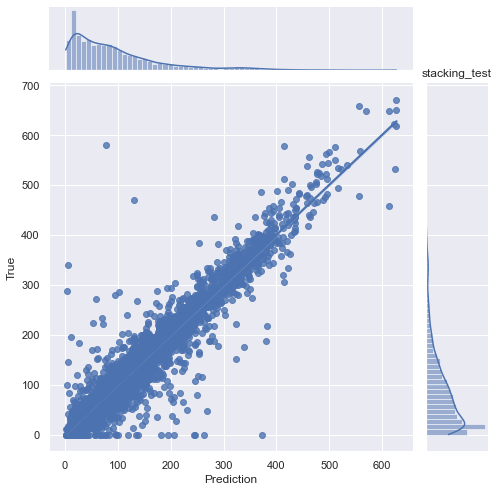

<Figure size 5760x5040 with 0 Axes>

In [228]:
model_performance_sc_plot(list(lr_knn_test_predict[:-1]),list(test_y[:-1]), 'stacking_test')


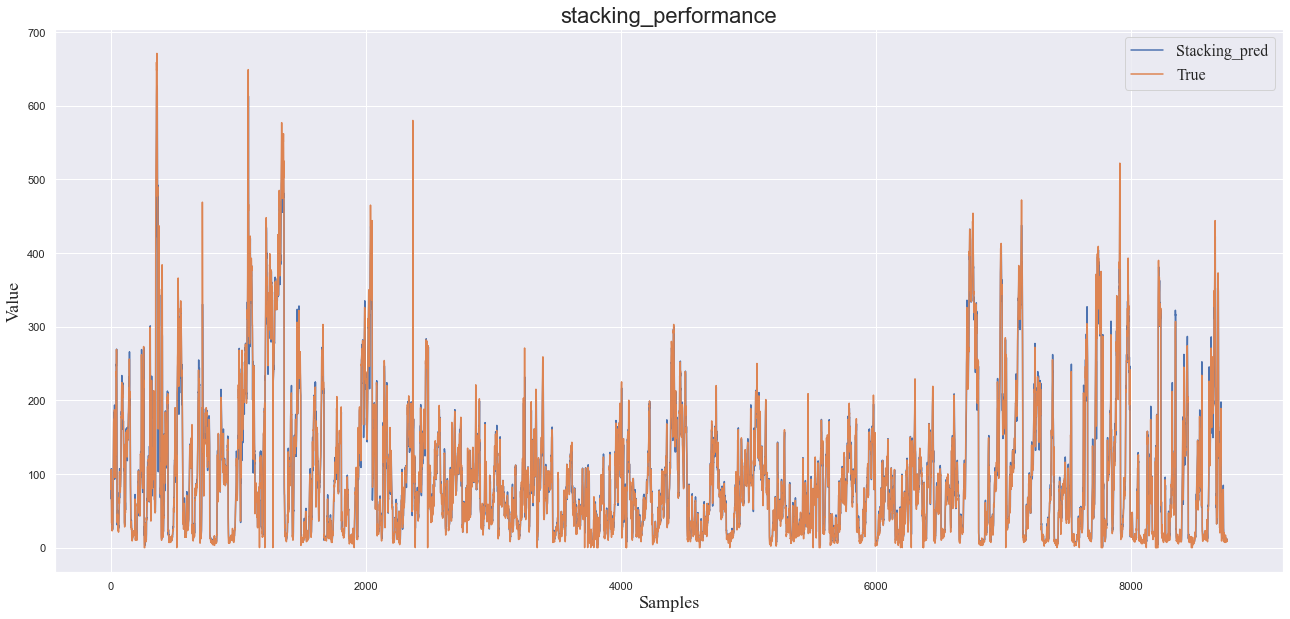

In [230]:

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}

fig = plt.figure(figsize=(22,10))
plt.plot(lr_knn_test_predict,label='Stacking_pred')
plt.plot(test_y,label='True')
plt.legend(prop=font1)
plt.xlabel("Samples",fontdict={'family' : 'Times New Roman',  'size'   : 18})
plt.ylabel("Value",fontdict={'family' : 'Times New Roman',  'size'   : 18})
plt.title('stacking_performance',fontsize=22)
plt.show()
fig.savefig('Stacking performance.svg',format='svg')



In [231]:
lr_model_knn

Ridge(alpha=0.001)

In [232]:
lr_model_knn.coef_

array([ 0.07554803,  0.57206358, -0.19896984,  0.45589764,  0.11251956,
       -0.00587036])

In [233]:
lr_model_knn.intercept_

-0.9065817821697522

In [234]:
lr_knn_train_x

array([[185.45082092285156, 177.68822363114162, 181.05809704921612,
        178.36535362815548, 184.72081572814523, 162.32],
       [125.65836334228516, 126.99014703252854, 130.67343778381337,
        129.33477700858703, 140.1790727071491, 145.84],
       [92.35558319091797, 102.91765214307125, 108.33859323541573,
        102.23257731976699, 112.60711075386796, 114.76],
       ...,
       [24.946102142333984, 25.095363842929515, 24.22643334551594,
        24.806954449242852, 23.57884923484974, 18.8],
       [54.17046356201172, 43.56561241238855, 54.90295019529486,
        54.3305633519788, 46.15114615406412, 20.92],
       [68.0179443359375, 68.03252698723766, 72.11032756395558,
        67.06490877022885, 54.71684791596721, 24.78]], dtype=object)

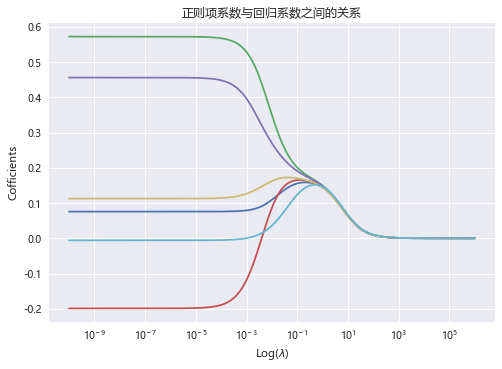

In [235]:
# 导入第三方模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")   # 忽略警告信息输出


# 构造不同的 lambda值
lambds = np.logspace(-10,6,200)
# 构造空列表，用于存储模型的偏回归系数
ridge_coffs = []
# 求解不同lambda对应的系数值
for lambd in lambds:
    ridge = Ridge(alpha=lambd,normalize=True)
    ridge.fit(lr_knn_train_x,lr_train_y)
    ridge_coffs.append(ridge.coef_)

# 绘制lambda 的对数与回归系数的关系
# 设置绘图风格
plt.style.use('seaborn')
# 为了画图中文可以正常显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体
plt.rcParams['axes.unicode_minus'] = False  #解决保存图像时负号'-'显示为方块的问题

plt.plot(lambds,ridge_coffs)
# 对x轴做对数处理
plt.xscale('log')
# 设置x轴和y轴标签
plt.xlabel('Log($\lambda$)')
plt.ylabel('Cofficients')
plt.title('正则项系数与回归系数之间的关系')
# 显示图形
plt.show()


In [236]:
# 加载模块
import plotly_express as px  

# 正则项系数与回归系数之间的关系
p_lam = [lambds] * 6
p_lam = pd.Series(pd.DataFrame(p_lam).values.ravel())
c_s = pd.DataFrame(ridge_coffs,columns=['c'+str(i) for i in range(1,7)])
c_res = pd.Series()
for i in range(6):
    temp = pd.Series(c_s['c'+str(i+1)])
    temp.index=len(lambds)*['c'+str(i+1)]
    c_res = pd.concat([c_res,temp])
c_res = pd.DataFrame(c_res)
c_res = c_res.reset_index()
xy_df= pd.concat([p_lam,c_res],axis=1)
xy_df.columns =['lambda','coef','coef_values']
px.line(xy_df,x="lambda",y='coef_values',log_x=True,color='coef',height=400,width=600)


In [237]:
lr_knn_test_predict

array([66.39520258, 86.2782444 , 93.3896595 , ..., 10.26768492,
        9.09329766, 11.41112991])

In [238]:
test_y

array([79.0, 92.0, 106.0, ..., 8.0, 12.0, nan], dtype=object)

In [253]:
np.save("./12.28/stacking.npy", lr_knn_test_predict[:-1])
print("save .npy done")

save .npy done


In [254]:
np.save("./12.28/test_y.npy", test_y[:-1])
print("save .npy done")

save .npy done


In [242]:
index = np.where(test_y>500)
print(index)
y_test_1 = []
y_hat_1 = []
for i in range(len(index)):
    y_test_1.append(test_y[index[i]])
    y_hat_1.append(lr_knn_test_predict[index[i]])

y_hat_1 = np.array(y_hat_1).reshape(1,-1)

y_test_1 = np.array(y_test_1).reshape(1,-1)

print("MSEwei",mean_squared_error(y_hat_1,y_test_1))
print("RMSEwei",GetRMSE(y_hat_1,y_test_1))
print("MAEwei",GetMAE(y_hat_1,y_test_1))
print("MAPEwei",GetMAPE_Order(y_hat_1,y_test_1))

(array([ 353,  354,  355,  356,  357,  358,  359,  360,  361,  362,  363,
       1076, 1077, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1348,
       1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 2368, 7914, 7915],
      dtype=int64),)
MSEwei 11262.696587013028
RMSEwei 106.12585258556479
MAEwei 63.818536793847095
MAPEwei 11.33845843682688


In [243]:
index = np.where(test_y<500)
print(index)
y_test_1 = []
y_hat_1 = []
for i in range(len(index)):
    y_test_1.append(test_y[index[i]])
    y_hat_1.append(lr_knn_test_predict[index[i]])

y_hat_1 = np.array(y_hat_1).reshape(1,-1)

y_test_1 = np.array(y_test_1).reshape(1,-1)

print("MSEwei",mean_squared_error(y_hat_1,y_test_1))
print("RMSEwei",GetRMSE(y_hat_1,y_test_1))
print("MAEwei",GetMAE(y_hat_1,y_test_1))

(array([   0,    1,    2, ..., 8753, 8754, 8755], dtype=int64),)
MSEwei 499.5008512220589
RMSEwei 22.349515682046867
MAEwei 12.077509751675956


In [244]:
index = np.where(test_y>300)
print(index)
y_test_1 = []
y_hat_1 = []
for i in range(len(index)):
    y_test_1.append(test_y[index[i]])
    y_hat_1.append(lr_knn_test_predict[index[i]])

y_hat_1 = np.array(y_hat_1).reshape(1,-1)

y_test_1 = np.array(y_test_1).reshape(1,-1)

print("MSEwei",mean_squared_error(y_hat_1,y_test_1))
print("RMSEwei",GetRMSE(y_hat_1,y_test_1))
print("MAEwei",GetMAE(y_hat_1,y_test_1))

(array([ 351,  352,  353,  354,  355,  356,  357,  358,  359,  360,  361,
        362,  363,  364,  365,  366,  367,  368,  369,  373,  374,  375,
        376,  377,  378,  379,  380,  401,  402,  524,  525,  526,  527,
        528,  529,  535,  542,  544,  545,  546,  547,  548,  549,  550,
        717,  718, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1084, 1089, 1090, 1091, 1092,
       1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103,
       1104, 1105, 1106, 1107, 1108, 1212, 1213, 1214, 1215, 1216, 1217,
       1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228,
       1229, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242,
       1243, 1244, 1245, 1246, 1247, 1248, 1251, 1252, 1253, 1254, 1256,
       1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267,
       1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293,
       1294, 1295, 1296, 1297, 1298, 1299, 1300, 1

In [245]:
index = np.where(test_y<300)
print(index)
y_test_1 = []
y_hat_1 = []
for i in range(len(index)):
    y_test_1.append(test_y[index[i]])
    y_hat_1.append(lr_knn_test_predict[index[i]])

y_hat_1 = np.array(y_hat_1).reshape(1,-1)

y_test_1 = np.array(y_test_1).reshape(1,-1)

print("MSEwei",mean_squared_error(y_hat_1,y_test_1))
print("RMSEwei",GetRMSE(y_hat_1,y_test_1))
print("MAEwei",GetMAE(y_hat_1,y_test_1))

(array([   0,    1,    2, ..., 8753, 8754, 8755], dtype=int64),)
MSEwei 446.06199679026895
RMSEwei 21.12017984748873
MAEwei 11.441490600668834


In [255]:
pre_ = np.load('./12.28/stacking.npy')

In [256]:
pre_

array([66.39520258, 86.2782444 , 93.3896595 , ..., 10.35341927,
       10.26768492,  9.09329766])

In [257]:
pre_.shape

(8756,)

In [262]:
lr_knn_test_predict.dtype

dtype('float64')

In [260]:
y_label = np.load('./12.28/test_y.npy',allow_pickle=True)

In [261]:
y_label

array([79.0, 92.0, 106.0, ..., 10.0, 8.0, 12.0], dtype=object)

In [263]:
y_new = np.array(test_y[:-1],dtype='float64')

In [265]:
y_new.dtype

dtype('float64')

In [266]:
lr_knn_test_predict

array([66.39520258, 86.2782444 , 93.3896595 , ..., 10.26768492,
        9.09329766, 11.41112991])

In [267]:
np.save("./12.28/test_y.npy", y_new)
print("save .npy done")

save .npy done
